# Лабораторная работа №4. Синтез КИХ-фильтров.
Лаборатория цифровой обработки сигналов, МФТИ

Вклад задач в итоговую оценку: 1.1-3.2 — 1 балл, 4.1 — 2 балла. Максимальная оценка ограничивается с момента наступления срока сдачи следующей лабораторной работы.

В данной лабораторной работе используется вариант 14.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

plt.ion()
%matplotlib inline

|      Вариант                                                                  | 1    | 2    | 3    |      4 | 5    | 6    | 7    | 8    | 9    | 10   | 11   | 12   | 13   | 14   | 15   | 16   | 17   | 18   | 19   | 20   |
|:-----------------------------------------------------------------------|:-----|:-----|:-----|:-------|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|
| Частота  дискретизации $f_s$, кГц                                      | 100  | 100  | 100  | 100    | 100  | 200  | 200  | 200  | 200  | 200  | 100  | 100  | 100  | 100  | 100  | 200  | 200  | 200  | 200  | 200  |
| Граничная частота полосы пропускания $f_1$, кГц                        | 10   | 9    | 11   |  12    | 15   | 20   | 21   | 23   | 24   | 25   | 9    | 10   | 11   | 12   | 13   | 26   | 27   | 28   | 29   | 30   |
| Граничная частота полосы задерживания $f_2$, кГц                        | 12   | 11   | 13   |  14    | 17   | 22   | 23   | 25   | 26   | 27   | 11   | 12   | 13   | 14   | 15   | 28   | 29   | 30   | 31   | 32   |
| Максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$  | 0.05 | 0.06 | 0.04 |   0.05 | 0.04 | 0.05 | 0.06 | 0.04 | 0.05 | 0.04 | 0.05 | 0.06 | 0.04 | 0.05 | 0.04 | 0.05 | 0.06 | 0.04 | 0.05 | 0.04 |
| Максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$ | 0.02 | 0.03 | 0.01 |   0.02 | 0.02 | 0.03 | 0.03 | 0.02 | 0.03 | 0.03 | 0.03 | 0.02 | 0.03 | 0.02 | 0.02 | 0.03 | 0.03 | 0.02 | 0.02 | 0.02 |
| Несущая частота $f_0$, кГц                                             | 3,9  | 3,8  | 3,9  |   4    | 4,6  | 5,9  | 6,5  | 6,7  | 8,1  | 7,4  | 4,5  | 5,1  | 4,3  | 5,2  | 5,3  | 5,7  | 8,2  | 9,1  | 8,7  | 9,5  |

In [2]:
fs = 100
f1 = 12
f2 = 14
f0 = 5.2
delta1 = 0.05
delta2 = 0.02

fc = (f1 + f2) / 2

In [3]:
def sample_signal(signal_func, N, fs):
    return np.array([signal_func(fs * i / N) for i in range(N)])

In [4]:
M = 1024 ** 2 # Используется во всех модулях для вычислений (обычно обратный ДПФ)

# Модуль 1. Метод частотной выборки синтеза КИХ-фильтров

## Задача 1.1. Синтез ФНЧ по идеальной АЧХ. 

Синтезировать КИХ-фильтр 28 порядка ($N=29$) на основе идеального фильтра нижних частот с частотой среза $f_c=(f_1+f_2)/2$ методом частотной выборки. 
Частоту дискретизации принять равной $f_s$.

$N = 29$ — нечётное число, импульсная характеристика синтезируемого фильтра будет симметричной, т.к. симмерична АЧХ идеального ФНЧ. Полученный из импульсной характеристики фильтр — КИХ фильтр с кусочно-линейной ФЧХ, т.к. импульсная характеристика симметрична.

а) Определить максимальные уровни пульсаций $\delta_1$ и $\delta_2$ в полосе пропускания и в полосе задерживания. 

б) Изобразить на одном графике АЧХ фильтра и отсчеты ДПФ. 

в) Построить импульсную характеристику КИХ-фильтра. Определить по виду импульсной характеристики, будет ли фильтр обладать постоянной фазовой и группой задержками.

г) Получить график для групповой задержки фильтра. Сравнить с выводом в пункте (в).

In [5]:
def get_ideal_lowpass_signal(f, fc, fs):
    if 0 <= f <= fc or fs - fc <= f <=  fs:
        return 1.0 + 0.0j
    else:
        return 0.0 + 0.0j

def get_ideal_lowpass_phase(f, N, fs):
    return np.exp(-2j * np.pi * (N - 1) / 2.0 * f / fs)

In [6]:
N = 29
H = sample_signal(lambda f: get_ideal_lowpass_signal(f, fc, fs) * get_ideal_lowpass_phase(f, N, fs), N, fs)
# H = sample_signal(lambda f: get_ideal_lowpass_signal(f, fc, fs), N, fs)

h = np.fft.ifft(H).real
H_uniform = abs(np.fft.fft(h, M))

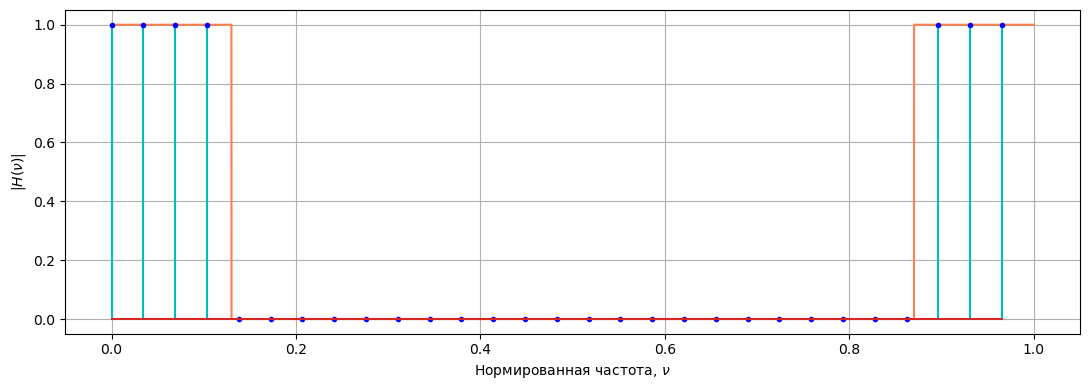

In [7]:
nu_band = np.linspace(0, fs, M) / fs
plt.figure(figsize=[11, 4])
plt.plot(nu_band, [abs(get_ideal_lowpass_signal(nu * fs, fc, fs)) for nu in nu_band], color='coral')
plt.stem(np.arange(N) / N, abs(H), linefmt='c', markerfmt='b.')
plt.xlabel('Нормированная частота, $\\nu$')
plt.ylabel('$|H(\\nu)|$')
plt.tight_layout()
plt.grid()

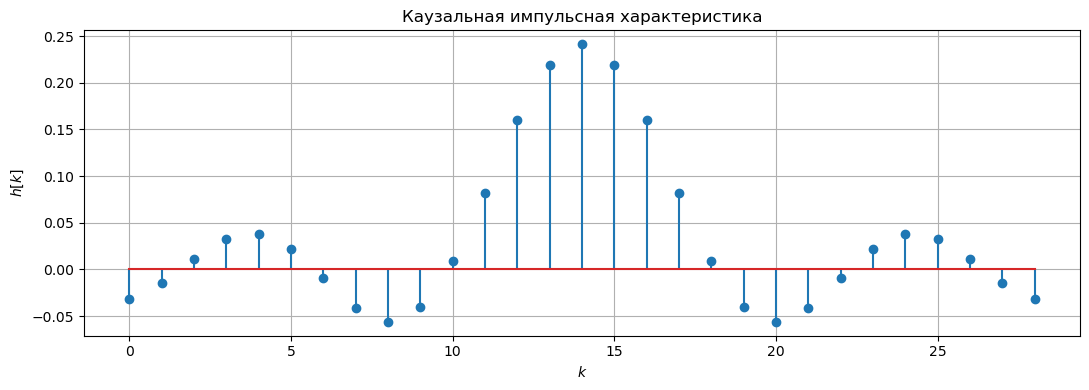

In [8]:
plt.figure(figsize=[11, 4])
plt.stem(np.arange(N), h)
plt.xlabel('$k$')
plt.ylabel('$h[k]$')
plt.title("Каузальная импульсная характеристика")
plt.grid()
plt.tight_layout()

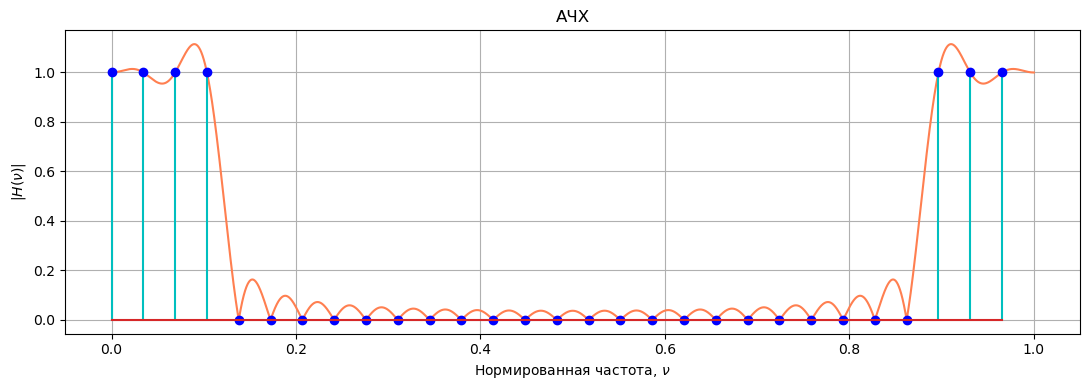

In [9]:
plt.figure(figsize=[11, 4])
plt.plot(np.arange(M) / M, H_uniform, color='coral')
plt.stem(np.arange(N) / N, abs(np.fft.fft(h)), linefmt='c', markerfmt='bo')
plt.grid()
plt.ylabel('$|H(\\nu)|$')
plt.xlabel('Нормированная частота, $\\nu$')
plt.title('АЧХ')
plt.tight_layout()

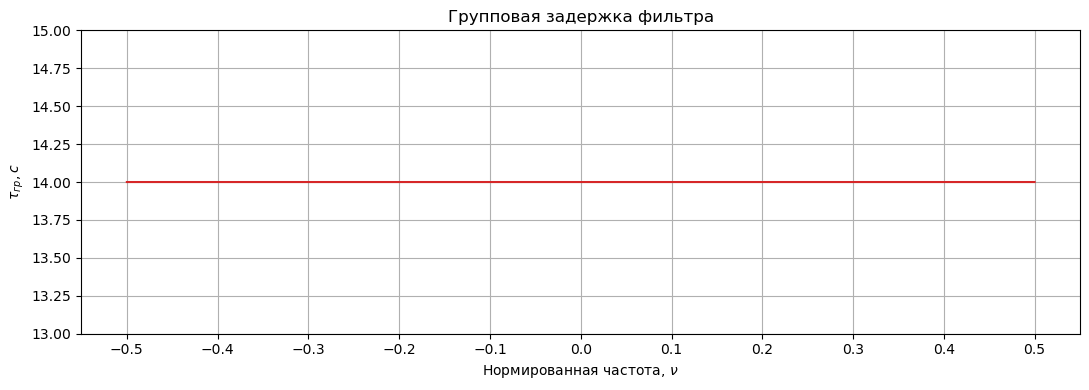

In [10]:
delta=1e-6
nu, gd = signal.group_delay((h, [1]), w=np.linspace(-0.5+delta, 0.5-delta, num=2048), fs=1)

plt.figure(figsize=[11, 4])
plt.title('Групповая задержка фильтра')
plt.plot(nu, gd*1, 'C3')
plt.ylabel('$\\tau_{{гр}}, c$')
plt.xlabel('Нормированная частота, $\\nu$')
plt.ylim([min(gd)-1, max(gd)+1])
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

Групповая задержка постоянна, т.к. $N = 29$ — нечётное число, а график импульсной характеристики симметричен.

Максимальные уровни пульсаций $\delta_1 = 0.115$ и $\delta_2 = 0.163$ в полосе пропускания и в полосе задерживания соответственно. 

## Задача 1.2. Синтез ФНЧ по непрерывной АЧХ.

Синтезировать КИХ-фильтр 28 порядка ($N=29$) на основе идеального фильтра нижних частот с граничной частотой полосы пропускания $f_1$ и с граничной частотой полосы задерживания $f_2$ методом частотной выборки. Частоту дискретизации принять равной $f_s$. Частотную характеристику идеального фильтра в полосе перехода аппроксимировать линейной функцией так, чтобы характеристика была непрерывной.

а) Определить максимальные уровни пульсаций $\delta_1$ и $\delta_2$ в полосе пропускания и в полосе задерживания. Сравнить с результатом в задаче 1.1.

б) Изобразить на одном графике АЧХ фильтра и отсчеты ДПФ. 

в) Построить импульсную характеристику полученного КИХ-фильтра. Определить по виду импульсной характеристики, будет ли 
фильтр обладать постоянной фазовой и группой задержками.

г) Получить график для групповой задержки фильтра. Сравнить с выводом в пункте (в).

д) Определить частоту среза (по уровню $-3$ дБ) модельного и полученного фильтров. 

In [11]:
def get_lowpass_signal(f, fs):
    if 0 <= f <= f1 or fs - f1 <= f <= fs:
        return 1.0 + 0.0j
    elif f1 < f < f2:
        return (f - f2) / (f1 - f2)
    elif fs - f2 < f < fs - f1:
        return (f - fs + f2) / (f2 - f1)
    else:
        return 0.0 + 0.0j

def get_lowpass_phase(f, N, fs):
    return np.exp(-2j * np.pi * (N - 1)/ 2.0 * f / fs)

In [12]:
N = 29

H = sample_signal(lambda f: get_lowpass_signal(f, fs) * get_lowpass_phase(f, N, fs), N, fs)
# H = sample_signal(lambda f: get_lowpass_signal(f, fs), N, fs)

h = np.fft.ifft(H).real
H_uniform = abs(np.fft.fft(h, M))

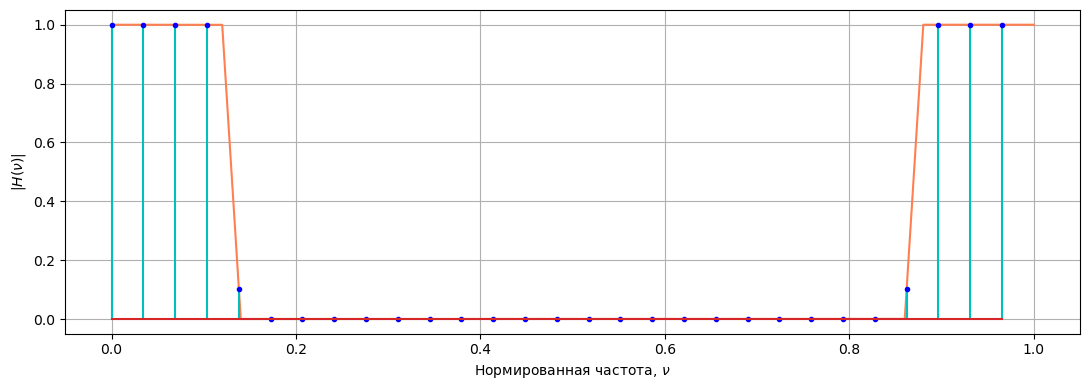

In [13]:
nu_band = np.linspace(0, fs, M) / fs
plt.figure(figsize=[11, 4])
plt.plot(nu_band, [abs(get_lowpass_signal(nu * fs, fs)) for nu in nu_band], color='coral')
plt.stem(np.arange(N) / N, abs(H), linefmt='c', markerfmt='b.')
plt.xlabel('Нормированная частота, $\\nu$')
plt.ylabel('$|H(\\nu)|$')
plt.tight_layout()
plt.grid()

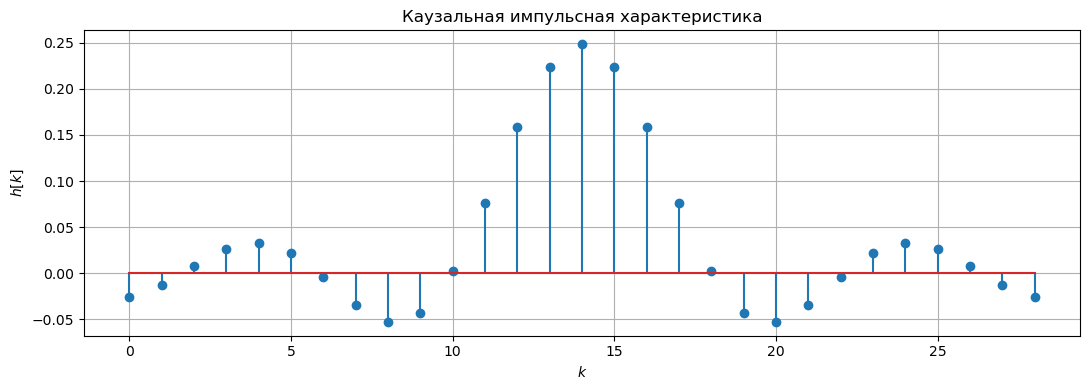

In [14]:
plt.figure(figsize=[11, 4])
plt.stem(np.arange(N), h)
plt.xlabel('$k$')
plt.ylabel('$h[k]$')
plt.title("Каузальная импульсная характеристика")
plt.grid()
plt.tight_layout()

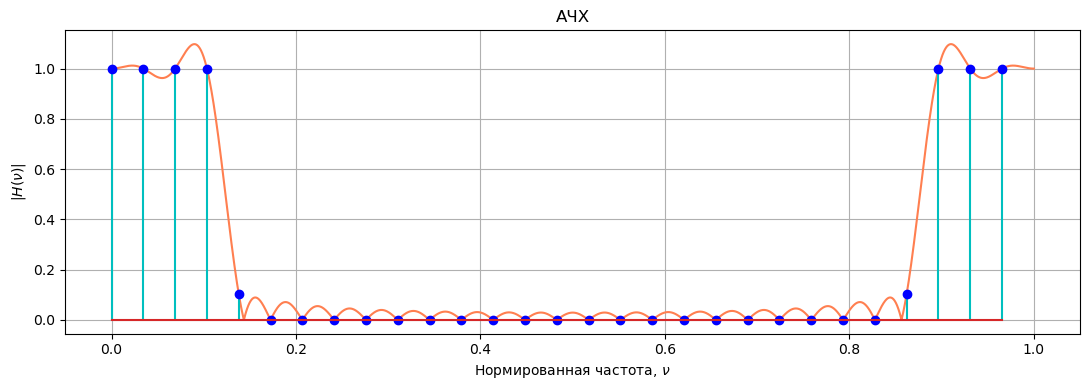

In [15]:
plt.figure(figsize=[11, 4])
plt.plot(np.arange(M) / M, H_uniform, color='coral')
plt.stem(np.arange(N) / N, abs(np.fft.fft(h)), linefmt='c', markerfmt='bo')
plt.grid()
plt.ylabel('$|H(\\nu)|$')
plt.xlabel('Нормированная частота, $\\nu$')
plt.title('АЧХ')
plt.tight_layout()

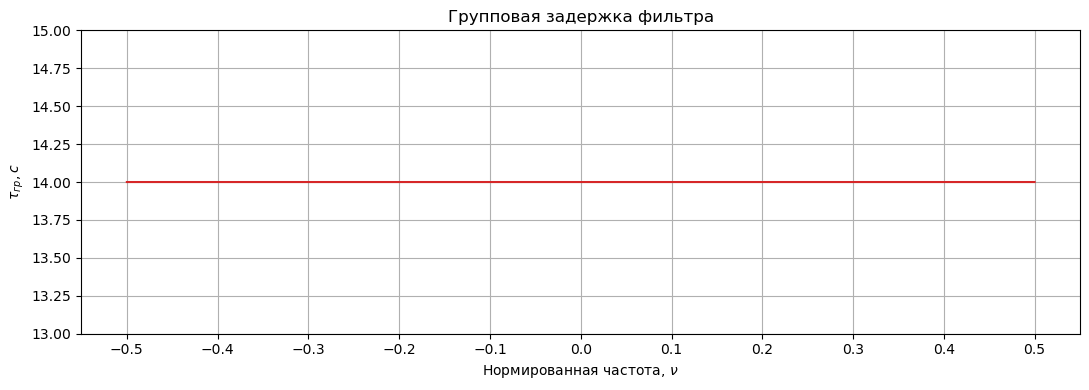

In [16]:
delta=1e-6
nu, gd = signal.group_delay((h, [1]), w=np.linspace(-0.5 + delta, 0.5 - delta, num=2048), fs=1)

plt.figure(figsize=[11, 4])
plt.title('Групповая задержка фильтра')
plt.plot(nu, gd*1, 'C3')
plt.ylabel('$\\tau_{{гр}}, c$')
plt.xlabel('Нормированная частота, $\\nu$')
plt.ylim([min(gd)-1, max(gd)+1])
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

Групповая задержка постоянна, т.к. $N = 29$ — нечётное число, а график импульсной характеристики симметричен.

Максимальные уровни пульсаций $\delta_1 = 0.099$ и $\delta_2 = 0.091$ в полосе пропускания и в полосе задерживания соответственно. 

Частота среза (уровень $1/\sqrt{2}$) модельного фильтра: $\nu = 0.126$, полученного фильтра: $\nu = 0.111$.

## Задача 1.3. Синтез фильтра с характеристикой «приподнятый косинус»

Синтезировать КИХ-фильтр 28 порядка ($N=29$) с частотой среза $f_c=(f_1+f_2)/2$  на основе фильтра приподнятого косинуса методом частотной выборки. Частоту дискретизации принять равной $f_s$. На интервале $[-f_s/2, f_s/2]$ частотная характеристика фильтра задается следующим образом 

$$H(f)=\left\{ \begin{matrix}
   1, & |f| < (1-\beta)f_c;\\
   \dfrac{1}{2}*\left( 1+\cos \left(\pi \dfrac{|f|-(1-\beta)f_c}{2\beta f_c} \right) \right), & (1-\beta) f_c \le |f| \le (1+\beta)f_c;  \\
   0,   &  |f| > (1+\beta)f_c. \\
\end{matrix} \right.$$

а) Подобрать такое $\beta$, чтобы модельный фильтр не выходил за максимально допустимые отклонения АЧХ в полосе пропускания и в полосе задерживания ($\delta_1$ и $\delta_2$). Изобразить полученную АЧХ фильтра.

б) Для синтезированного фильтра определить максимальные уровни пульсаций $\delta_1$ и $\delta_2$ в полосе пропускания и в полосе задерживания. Сравнить с результатами в задаче 1.1 и задаче 1.2.

в) Изобразить на одном графике АЧХ фильтра и отсчеты ДПФ. 

г) Построить импульсную характеристику полученного КИХ-фильтра. Определить по виду импульсной характеристики, будет ли 
фильтр обладать постоянной фазовой и группой задержками.

д) Получить график для групповой задержки фильтра. Сравнить с выводом в пункте (г).

е) Определить частоту среза (по уровню $-3$ дБ) полученного фильтра. Сравнить с задачей 1.2.


In [17]:
def get_lowpass_signal(f, fc, fs, beta):
    if f < (1 - beta) * fc or (fs - f) < (1 - beta) * fc:
        return 1.0 + 0.0j
    elif (1 - beta) * fc <= f <= (1 + beta) * fc:
        return 0.5 * (1 + np.cos(np.pi * (f - (1 - beta) * fc) / (2 * beta * fc))) + 0.0j
    elif (1 - beta) * fc <= (fs - f) <= (1 + beta) * fc:
        return 0.5 * (1 + np.cos(np.pi * (fs - f - (1 - beta) * fc) / (2 * beta * fc))) + 0.0j
    else:
        return 0.0 + 0.0j

def get_lowpass_phase(f, N, fs):
    return np.exp(-2j * np.pi * (N - 1)/ 2.0 * f / fs)

In [18]:
N = 29
beta = 0.26

H = sample_signal(lambda f: get_lowpass_signal(f, fc, fs, beta) * get_lowpass_phase(f, N, fs), N, fs)
# H = sample_signal(lambda f: get_lowpass_signal(f, fc, fs, beta), N, fs)

h = np.fft.ifft(H).real
H_uniform = abs(np.fft.fft(h, M))

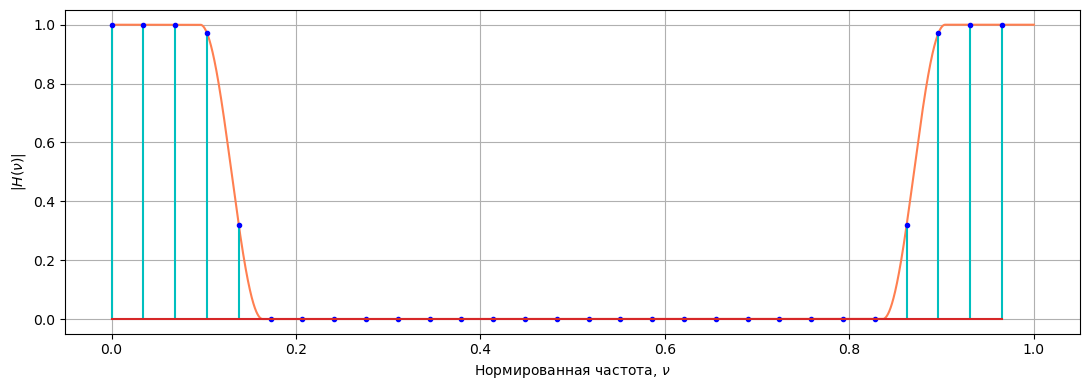

In [19]:
nu_band = np.linspace(0, fs, M) / fs
plt.figure(figsize=[11, 4])
plt.plot(nu_band, [abs(get_lowpass_signal(nu * fs, fc, fs, beta)) for nu in nu_band], color='coral')
plt.stem(np.arange(N) / N, abs(H), linefmt='c', markerfmt='b.')
plt.xlabel('Нормированная частота, $\\nu$')
plt.ylabel('$|H(\\nu)|$')
plt.tight_layout()
plt.grid()

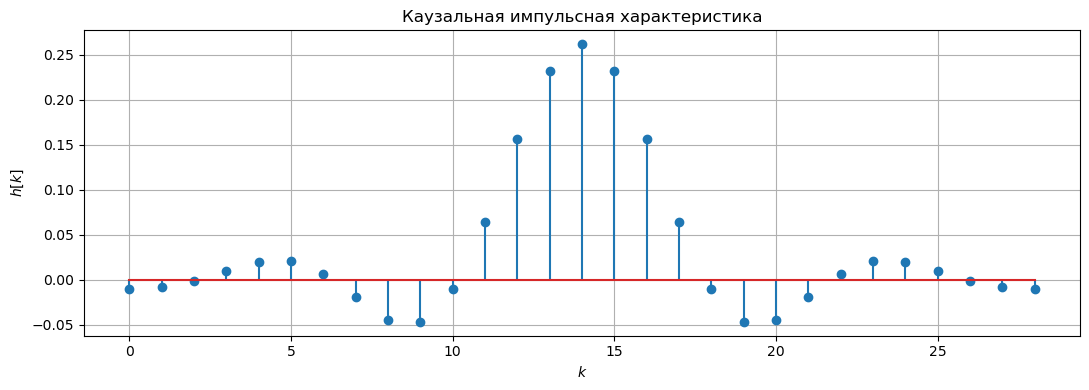

In [20]:
plt.figure(figsize=[11, 4])
plt.stem(np.arange(N), h)
plt.xlabel('$k$')
plt.ylabel('$h[k]$')
plt.title("Каузальная импульсная характеристика")
plt.grid()
plt.tight_layout()

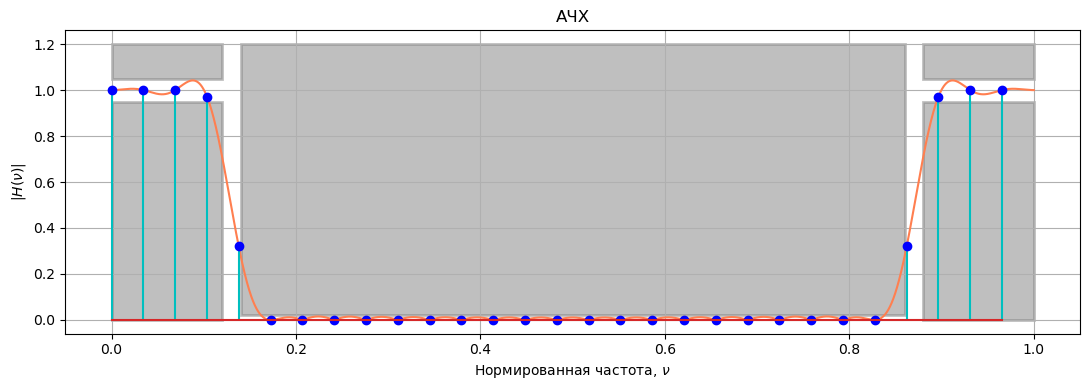

In [21]:
plt.figure(figsize=[11, 4])
plt.plot(np.arange(M) / M, H_uniform, color='coral')
plt.stem(np.arange(N) / N, abs(np.fft.fft(h)), linefmt='c', markerfmt='bo')
plt.grid()
plt.ylabel('$|H(\\nu)|$')
plt.xlabel('Нормированная частота, $\\nu$')
plt.title('АЧХ')
plt.fill([f2 / fs, f2 / fs, (fs - f2) / fs, (fs - f2) / fs], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([f1 / fs, f1 / fs, 0, 0], [0, 1 - delta1, 1 - delta1, 0], color='gray', lw=2, alpha=0.5)
plt.fill([f1 / fs, f1 / fs, 0, 0], [1 + delta1, 1.2, 1.2, 1 + delta1], color='gray', lw=2, alpha=0.5)

plt.fill([(fs - f1) / fs, (fs - f1) / fs, 1, 1], [0, 1 - delta1, 1 - delta1, 0], color='gray', lw=2, alpha=0.5)
plt.fill([(fs - f1) / fs, (fs - f1) / fs, 1, 1], [1 + delta1, 1.2, 1.2, 1 + delta1], color='gray', lw=2, alpha=0.5)
plt.tight_layout()

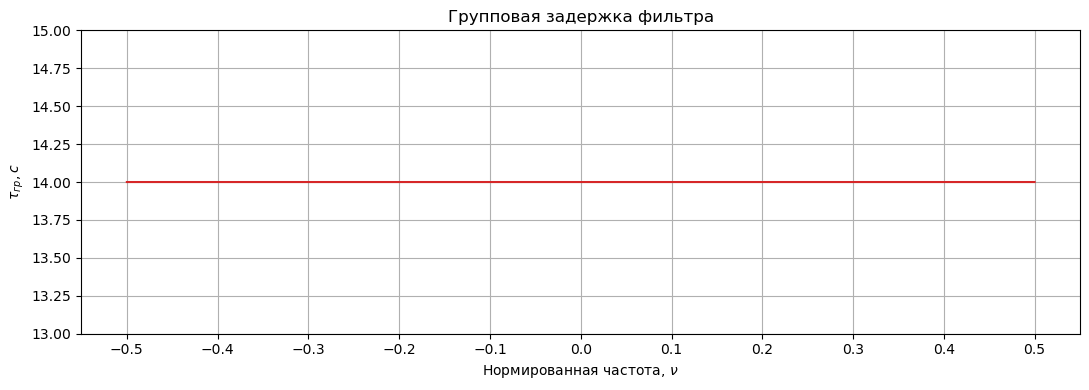

In [22]:
delta=1e-6
nu, gd = signal.group_delay((h, [1]), w=np.linspace(-0.5 + delta, 0.5 - delta, num=2048), fs=1)

plt.figure(figsize=[11, 4])
plt.title('Групповая задержка фильтра')
plt.plot(nu, gd*1, 'C3')
plt.ylabel('$\\tau_{{гр}}, c$')
plt.xlabel('Нормированная частота, $\\nu$')
plt.ylim([min(gd)-1, max(gd)+1])
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

Групповая задержка постоянна, т.к. $N = 29$ — нечётное число, а график импульсной характеристики симметричен.

Максимальные уровни пульсаций $\delta_1 = 0.0425$ и $\delta_2 = 0.0126$ в полосе пропускания и в полосе задерживания соответственно. 

Частота среза (уровень $1/\sqrt{2}$) модельного фильтра: $\nu = 0.1366$, полученного фильтра: $\nu = 0.119$.

#  Модуль 2. Метод окон для синтеза КИХ-фильтров

### Задача 2.1. Сравнение АЧХ фильтров одного порядка 
Синтезировать КИХ-фильтры нижних частот c частотой среза $f_c$ при частоте дискретизации $f_s$ порядка $R=28$ ($N=29$) с использованием следующих окон:

* прямоугольное (окно Дирихле)
$$w[k]=\left\{ \begin{matrix}
   1,  \\
   0,  \\
\end{matrix}\begin{matrix}
   \ \ 0\le k\le N-1;  \\
   \left\{ k<0 \right\}\cup \left\{ k\ge N \right\}.  \\
\end{matrix} \right.$$

* окно Ханна 
$$w[k]=\left\{ \begin{matrix}
   0,5-0,5\cos \dfrac{2\pi k}{N-1}, & 0\le k\le N-1;  \\
   0, &\left\{ k<0 \right\}\cup \left\{ k\ge N \right\}. \\
\end{matrix} \right.$$

* окно Хэмминга
$$w[k]=\left\{ \begin{matrix}
   0,54-0,46\cos \dfrac{2\pi k}{N-1}, & 0\le k\le N-1;  \\
   0, &\left\{ k<0 \right\}\cup \left\{ k\ge N \right\}. \\
\end{matrix} \right.$$

* окно Блэкмана
$$w[k]=\left\{ \begin{matrix}
   0,42-0,5\cos \dfrac{2\pi k}{N-1}+0,08\cos \dfrac{4\pi k}{N-1}, & 0\le k\le N-1;  \\
   0, &\left\{ k<0 \right\}\cup \left\{ k\ge N \right\}. \\
\end{matrix} \right.$$

In [23]:
N = 29
k = np.arange(N)

#### Графики оконных функций

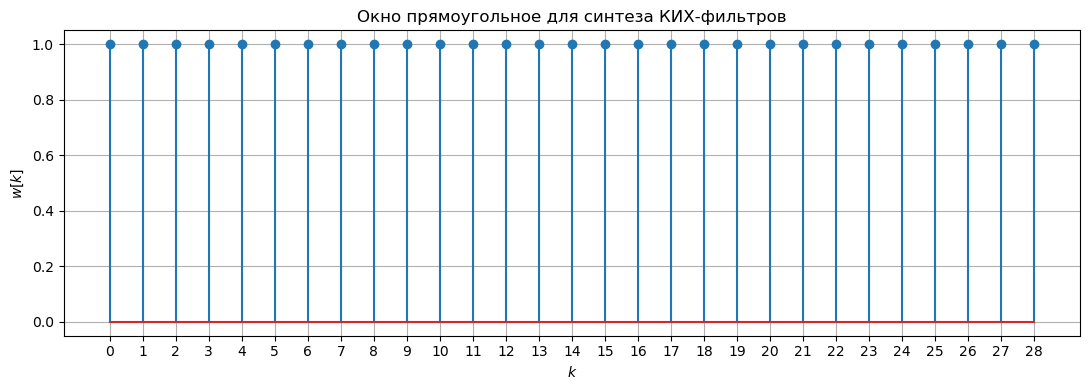

In [24]:
w_boxcar = signal.windows.boxcar(M=N)

plt.figure(figsize=[11, 4])
plt.stem(np.arange(w_boxcar.size), w_boxcar)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$w[k]$')
plt.title("Окно прямоугольное для синтеза КИХ-фильтров")
plt.xticks(k)
plt.tight_layout()


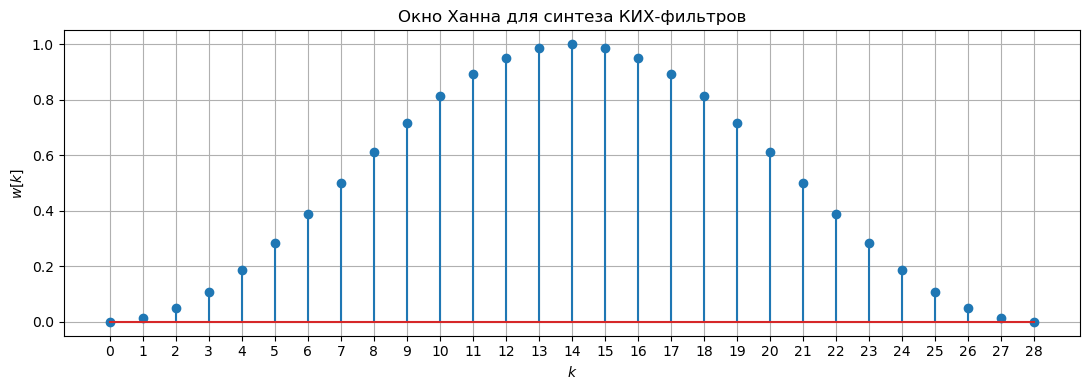

In [25]:
w_hann = signal.windows.hann(M=N, sym=True)

plt.figure(figsize=[11, 4])
plt.stem(np.arange(w_hann.size), w_hann)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$w[k]$')
plt.title("Окно Ханна для синтеза КИХ-фильтров")
plt.xticks(k)
plt.tight_layout()

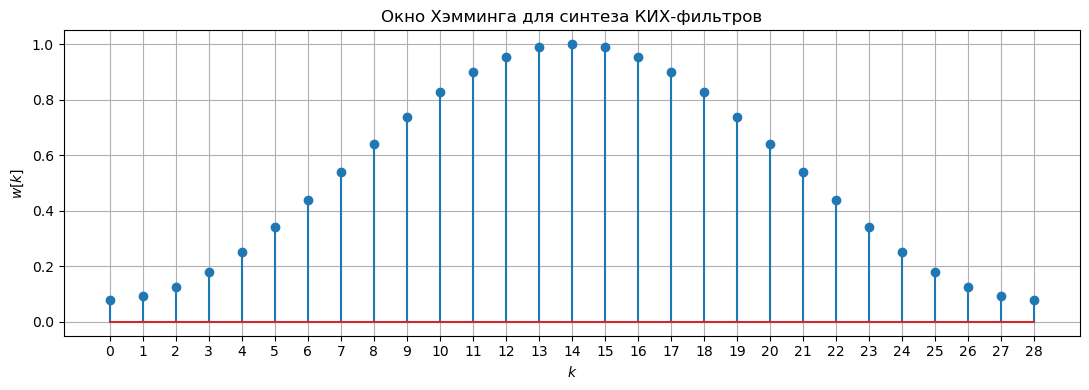

In [26]:
w_hamming = signal.windows.hamming(M=N, sym=True)

plt.figure(figsize=[11, 4])
plt.stem(np.arange(w_hamming.size), w_hamming)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$w[k]$')
plt.title("Окно Хэмминга для синтеза КИХ-фильтров")
plt.xticks(k)
plt.tight_layout()

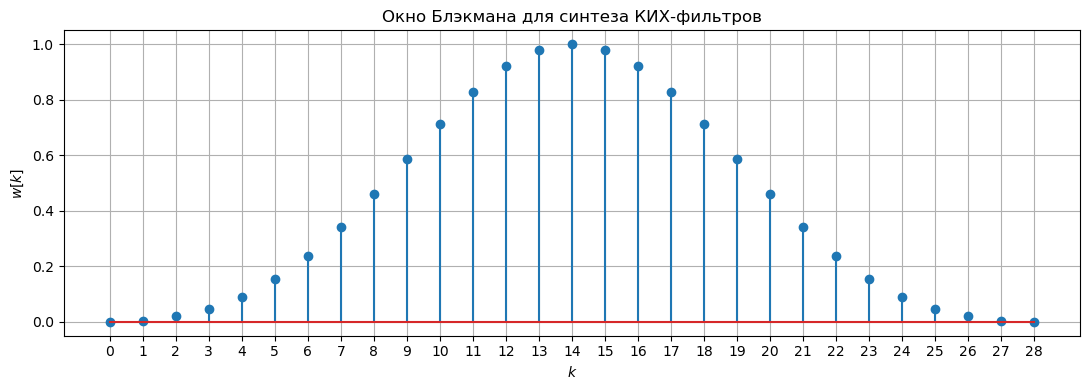

In [27]:
w_blackman = signal.windows.blackman(M=N, sym=True)

plt.figure(figsize=[11, 4])
plt.stem(np.arange(w_blackman.size), w_blackman)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$w[k]$')
plt.title("Окно Блэкмана для синтеза КИХ-фильтров")
plt.xticks(k)
plt.tight_layout()

#### Синтез КИХ-фильтров для оконных функций

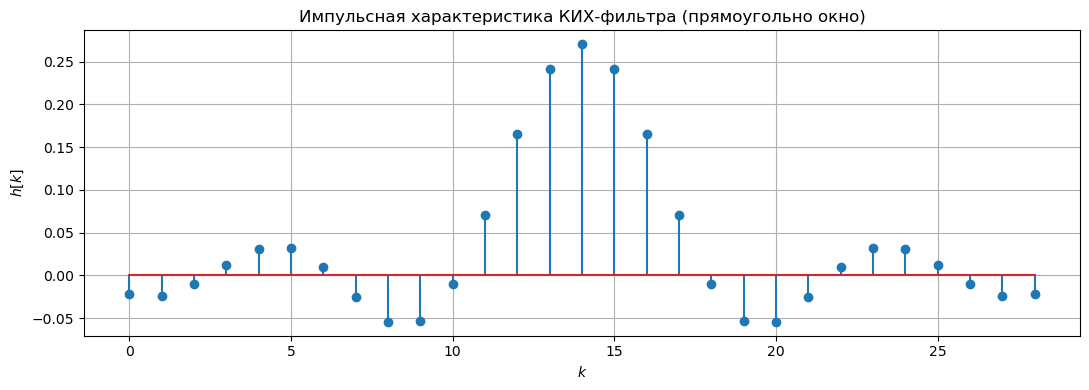

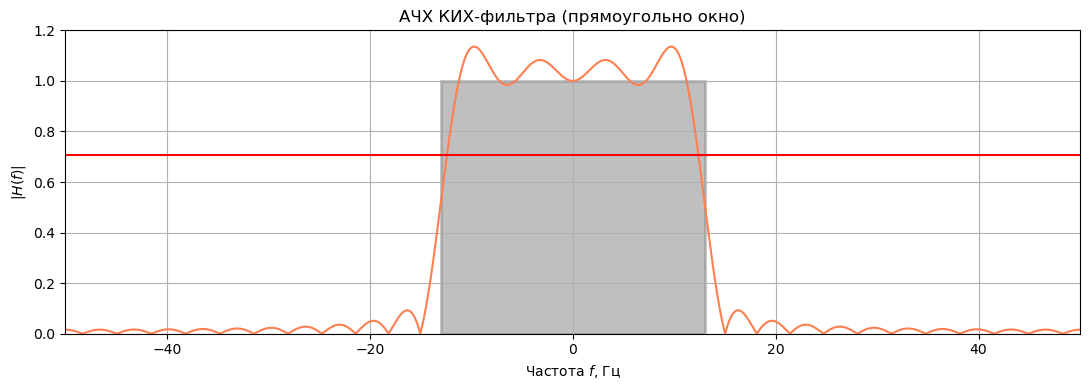

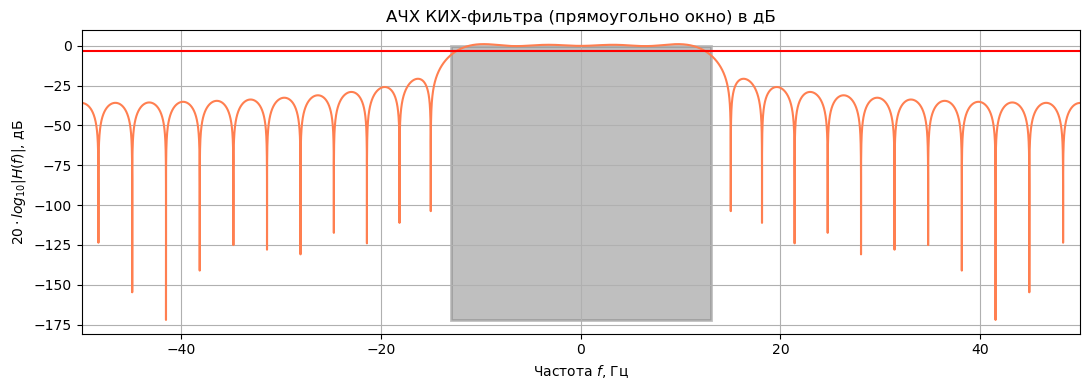

In [28]:
h = signal.firwin(numtaps=N, cutoff=fc, width=None, window='boxcar', pass_zero='lowpass', fs=fs)
H = abs(np.fft.fftshift(np.fft.fft(h, M)))

plt.figure(figsize=[11, 4])
plt.stem(np.arange(N), h)
plt.xlabel('$k$')
plt.ylabel('$h[k]$')
plt.title("Импульсная характеристика КИХ-фильтра (прямоугольно окно)")
plt.grid()
plt.tight_layout()

plt.figure(figsize=[11, 4])
plt.plot(fs * (np.arange(M) / M - 0.5), H, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ КИХ-фильтра (прямоугольно окно)')
plt.xlim([-fs / 2, fs / 2])
plt.ylim([0.0, 1.2])
plt.axhline(y=1 / np.sqrt(2), color='red', linestyle='-', label='Уровень среза')
plt.fill([-fc, -fc, fc, fc], [0, 1, 1, 0], color='gray', lw=2, alpha=0.5)
plt.tight_layout()

plt.figure(figsize=[11, 4])
plt.plot(fs * (np.arange(M) / M - 0.5), 20 * np.log10(H), color='coral')
plt.grid()
plt.ylabel('$20 \\cdot log_{10}|H(f)|$, дБ')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ КИХ-фильтра (прямоугольно окно) в дБ')
plt.xlim([-fs / 2, fs / 2])
plt.axhline(y=-3, color='red', linestyle='-', label='Уровень среза')
plt.fill([-fc, -fc, fc, fc], [min(20 * np.log10(H)), 0, 0, min(20 * np.log10(H))], color='gray', lw=2, alpha=0.5)
plt.tight_layout()
plt.show()

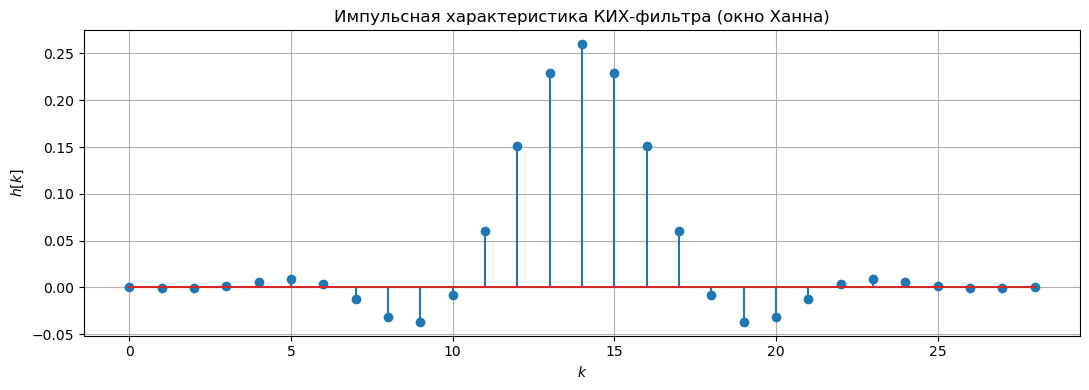

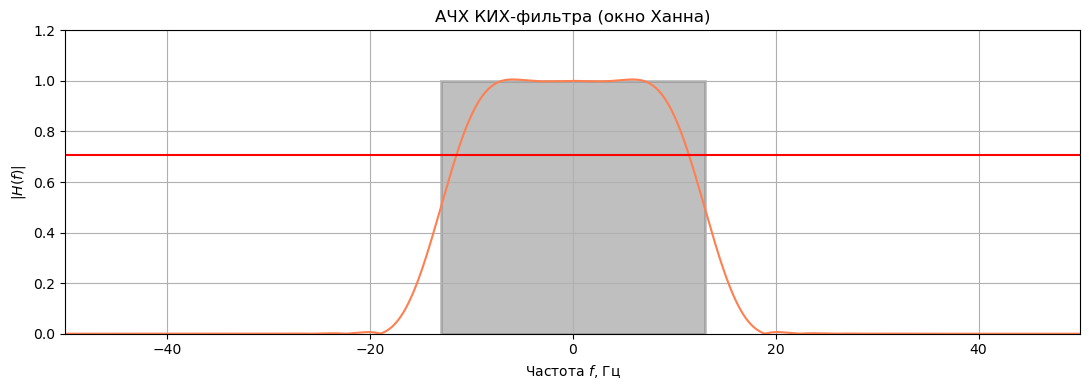

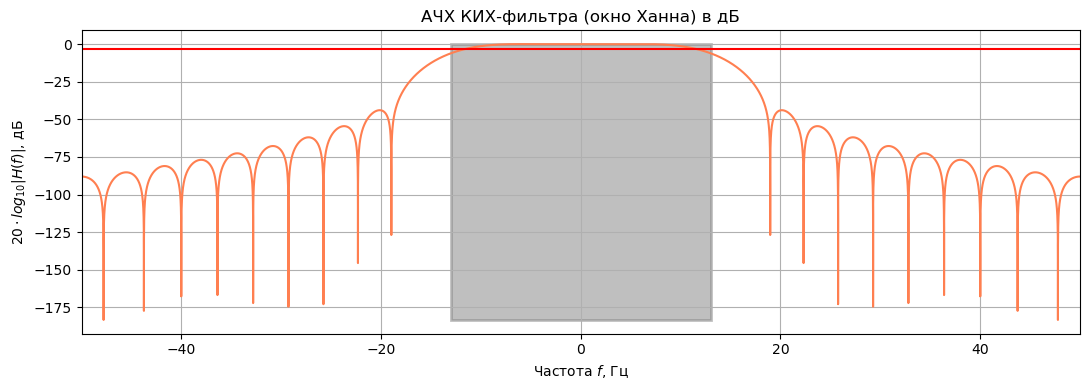

In [29]:
h = signal.firwin(numtaps=N, cutoff=fc, width=None, window='hann', pass_zero='lowpass', fs=fs)
H = abs(np.fft.fftshift(np.fft.fft(h, M)))

plt.figure(figsize=[11, 4])
plt.stem(np.arange(N), h)
plt.xlabel('$k$')
plt.ylabel('$h[k]$')
plt.title("Импульсная характеристика КИХ-фильтра (окно Ханна)")
plt.grid()
plt.tight_layout()

plt.figure(figsize=[11, 4])
plt.plot(fs * (np.arange(M) / M - 0.5), H, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ КИХ-фильтра (окно Ханна)')
plt.xlim([-fs / 2, fs / 2])
plt.ylim([0.0, 1.2])
plt.axhline(y=1/np.sqrt(2), color='red', linestyle='-', label='Уровень среза')
plt.fill([-fc, -fc, fc, fc], [0, 1, 1, 0], color='gray', lw=2, alpha=0.5)
plt.tight_layout()

plt.figure(figsize=[11, 4])
plt.plot(fs * (np.arange(M) / M - 0.5), 20 * np.log10(H), color='coral')
plt.grid()
plt.ylabel('$20 \\cdot log_{10}|H(f)|$, дБ')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ КИХ-фильтра (окно Ханна) в дБ')
plt.xlim([-fs / 2, fs / 2])
plt.axhline(y=-3, color='red', linestyle='-', label='Уровень среза')
plt.fill([-fc, -fc, fc, fc], [min(20 * np.log10(H)), 0, 0, min(20 * np.log10(H))], color='gray', lw=2, alpha=0.5)
plt.tight_layout()
plt.show()

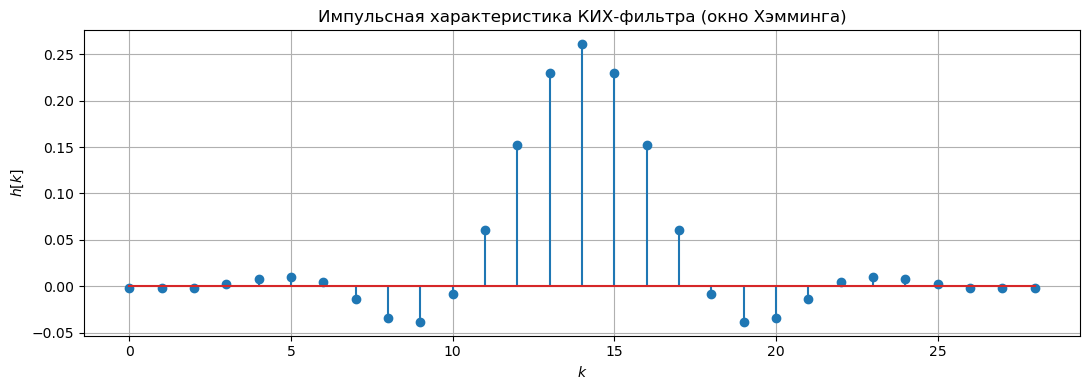

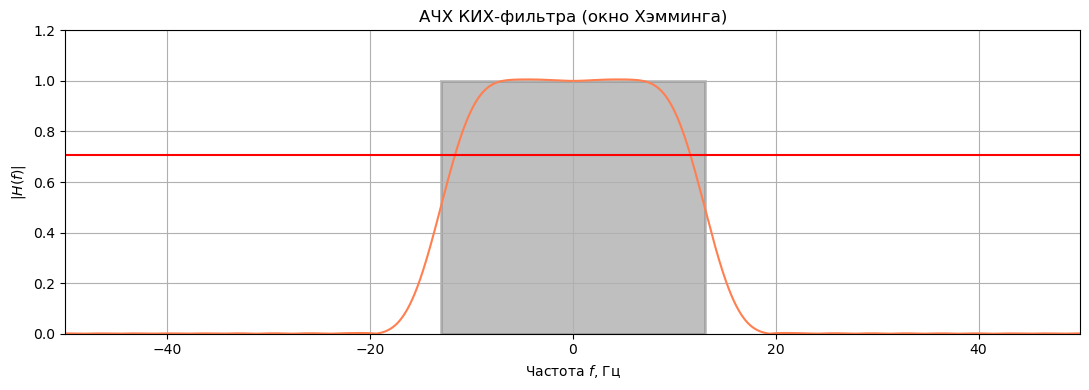

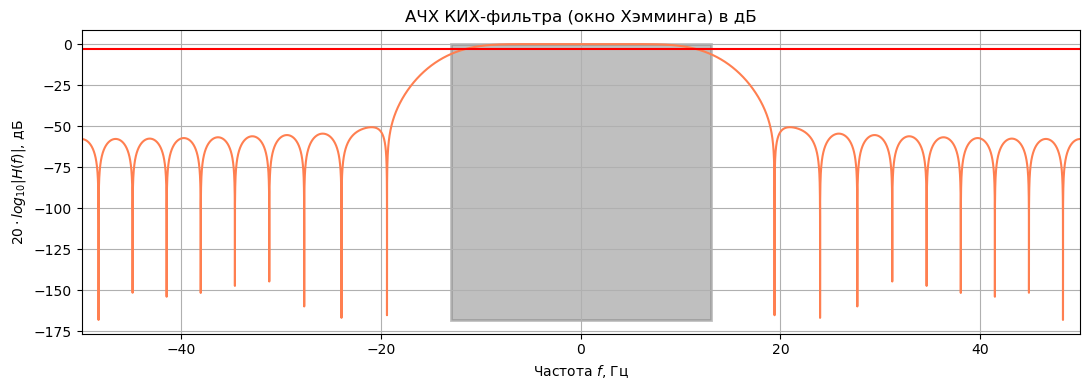

In [30]:
h = signal.firwin(numtaps=N, cutoff=fc, width=None, window='hamming', pass_zero='lowpass', fs=fs)
H = abs(np.fft.fftshift(np.fft.fft(h, M)))

plt.figure(figsize=[11, 4])
plt.stem(np.arange(N), h)
plt.xlabel('$k$')
plt.ylabel('$h[k]$')
plt.title("Импульсная характеристика КИХ-фильтра (окно Хэмминга)")
plt.grid()
plt.tight_layout()

plt.figure(figsize=[11, 4])
plt.plot(fs * (np.arange(M) / M - 0.5), H, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ КИХ-фильтра (окно Хэмминга)')
plt.xlim([-fs / 2, fs / 2])
plt.ylim([0.0, 1.2])
plt.axhline(y=1/np.sqrt(2), color='red', linestyle='-', label='Уровень среза')
plt.fill([-fc, -fc, fc, fc], [0, 1, 1, 0], color='gray', lw=2, alpha=0.5)
plt.tight_layout()

plt.figure(figsize=[11, 4])
plt.plot(fs * (np.arange(M) / M - 0.5), 20 * np.log10(H), color='coral')
plt.grid()
plt.ylabel('$20 \\cdot log_{10}|H(f)|$, дБ')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ КИХ-фильтра (окно Хэмминга) в дБ')
plt.xlim([-fs / 2, fs / 2])
plt.axhline(y=-3, color='red', linestyle='-', label='Уровень среза')
plt.fill([-fc, -fc, fc, fc], [min(20 * np.log10(H)), 0, 0, min(20 * np.log10(H))], color='gray', lw=2, alpha=0.5)
plt.tight_layout()
plt.show()


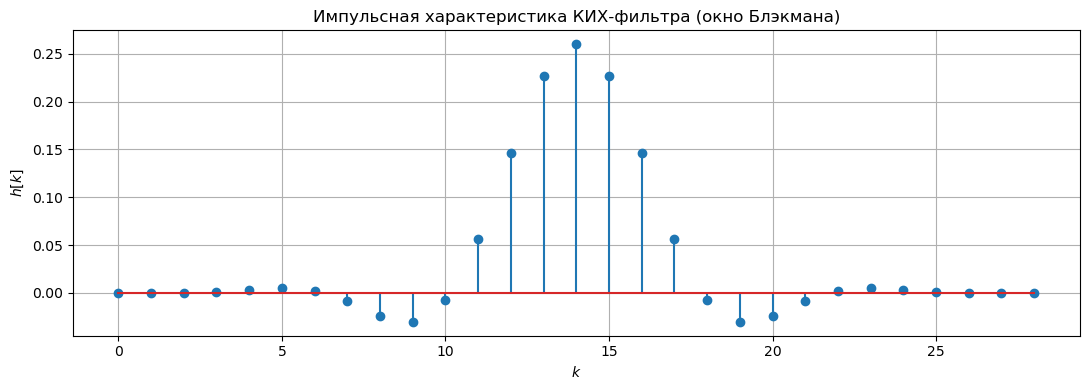

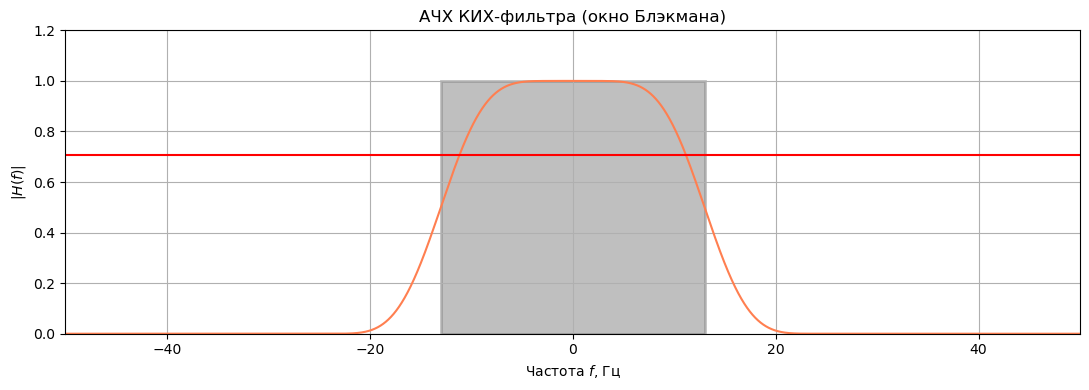

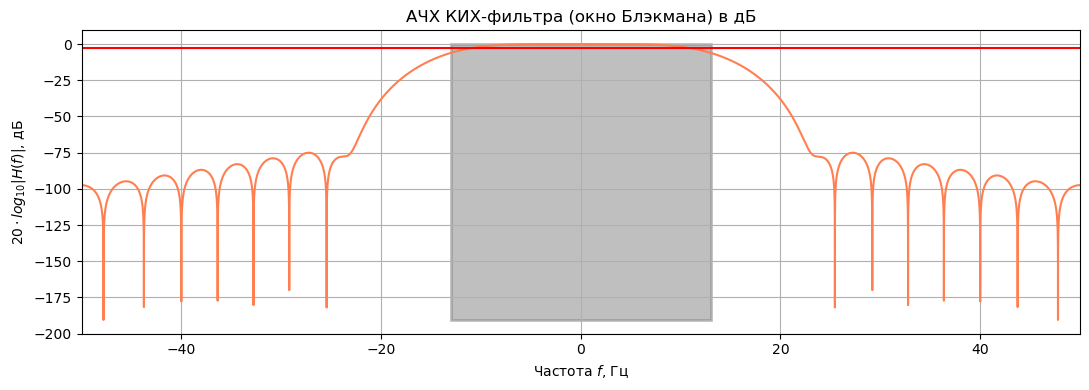

In [31]:
h = signal.firwin(numtaps=N, cutoff=fc, width=None, window='blackman', pass_zero='lowpass', fs=fs)
H = abs(np.fft.fftshift(np.fft.fft(h, M)))

plt.figure(figsize=[11, 4])
plt.stem(np.arange(N), h)
plt.xlabel('$k$')
plt.ylabel('$h[k]$')
plt.title("Импульсная характеристика КИХ-фильтра (окно Блэкмана)")
plt.grid()
plt.tight_layout()

plt.figure(figsize=[11, 4])
plt.plot(fs * (np.arange(M) / M - 0.5), H, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ КИХ-фильтра (окно Блэкмана)')
plt.xlim([-fs / 2, fs / 2])
plt.ylim([0.0, 1.2])
plt.axhline(y=1/np.sqrt(2), color='red', linestyle='-', label='Уровень среза')
plt.fill([-fc, -fc, fc, fc], [0, 1, 1, 0], color='gray', lw=2, alpha=0.5)
plt.tight_layout()

plt.figure(figsize=[11, 4])
plt.plot(fs * (np.arange(M) / M - 0.5), 20 * np.log10(H), color='coral')
plt.grid()
plt.ylabel('$20 \\cdot log_{10}|H(f)|$, дБ')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ КИХ-фильтра (окно Блэкмана) в дБ')
plt.xlim([-fs / 2, fs / 2])
plt.axhline(y=-3, color='red', linestyle='-', label='Уровень среза')
plt.fill([-fc, -fc, fc, fc], [min(20 * np.log10(H)), 0, 0, min(20 * np.log10(H))], color='gray', lw=2, alpha=0.5)
plt.tight_layout()
plt.show()

Построить графики оконной функции $w[k]$, импульсной характеристики КИХ-фильтра $h[k]$, АЧХ КИХ-фильтра(в линейном масштабе и в дБ). Определить по графикам максимальный уровень пульсаций по полосе задерживания в дБ. Заполнить таблицу. Частоту среза определять по уровню -3дБ.

In [32]:
import pandas as pd
plot_data = {}
plot_data["Окно Дирихле"]  = ["12.42", "-20.74"]
plot_data["Окно Ханна"]    = ["11.46", "-43.87"]
plot_data["Окно Хэмминга"] = ["11.64", "-50.56"]
plot_data["Окно Блэкмана"] = ["11.16", "-74.83"]

df2_1 = pd.DataFrame(data=plot_data, columns = plot_data.keys(),
            index=['Частота среза фильтра, Гц', 'Максимальный уровень пульсаций  фильтра, дБ'])
# генерировать markdown таблицу
# print(df2_1.to_markdown())
df2_1

,Окно Дирихле,Окно Ханна,Окно Хэмминга,Окно Блэкмана
"Частота среза фильтра, Гц",12.42,11.46,11.64,11.16
"Максимальный уровень пульсаций фильтра, дБ",-20.74,-43.87,-50.56,-74.83


### Задача 2.2. Синтез ФНЧ с окном Хемминга. 

Синтезировать КИХ-фильтр нижних частот с окном Хемминга наименьшего порядка при заданных требованиях к АЧХ:
* частота дискретизации $f_s$,
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$,
* максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$.

Воспользоваться следующей итерационной процедурой [1]:

1) Оценить длину окна по формуле 

$$\hat{N}=\left[\dfrac{3,3 f_s}{\Delta f} \right], \;\;  \Delta f=f_2-f_1$$

2) Взвесить импульсную характеристику идеального фильтра c ФЧХ $\varphi(\theta)=- \dfrac{R}{2} \theta$ окном Хэмминга выбранной длины (``scipy.firwin``, $f_c=(f_1+f_2)/2$).

$$h[k]=\left\{ \begin{matrix}
   {{h}_{\text{ideal}}}[k]w[k],  \\
   0,  \\
\end{matrix}\begin{matrix}
   \ \ 0\le k\le N-1;  \\
   \left\{ k<0 \right\}\cup \left\{ k\ge N \right\}.  \\
\end{matrix} \right.$$

$$w[k]=\left\{ \begin{matrix}
   0,54-0,46\cos \dfrac{2\pi k}{N-1}, & 0\le k\le N-1;  \\
   0, &\left\{ k<0 \right\}\cup \left\{ k\ge N \right\}. \\
\end{matrix} \right.$$

3) Проверить выполнение требований к АЧХ фильтра. Если требования не выполняются, следует увеличить порядок фильтра $R$ (на некоторое целое число) и перейти на п. 2. Если требования выполняются, то нужно уменьшить порядок фильтра  $R$ и перейти на п. 2. Уменьшение и увеличение порядка производится до тех пор, пока не будет найден минимальный порядок , при котором выполняются требования к АЧХ и уменьшение порядка на единицу приводит к нарушению требований к фильтру. 

Проверку требований к АЧХ можно произвести по графику, используя
* backend notebook `%matplotlib notebook` (в Jupyter Notebook)
* `plt.xlim()` и `plt.ylim()` (в Google Colab или в Jupyter Notebook)

Приведите графики АЧХ КИХ-фильтра с начальным ($\hat{R}=\hat{N}-1$) и конечным $R_\min$ порядками в итерационной процедуре. 
______

[1] Солонина, А. И. Цифровая обработка сигналов в зеркале MATLAB : учебное пособие / А. И. Солонина .— Санкт-Петербург : БХВ-Петербург, 2021 .— 560 с. — (Учебная литература для вузов).

P.S. Есть в библиотеке МФТИ. 
______

#### Изначальная оценка

In [33]:
N_0 = int(np.ceil(3.3* fs / (f2 - f1)))
N_0

165

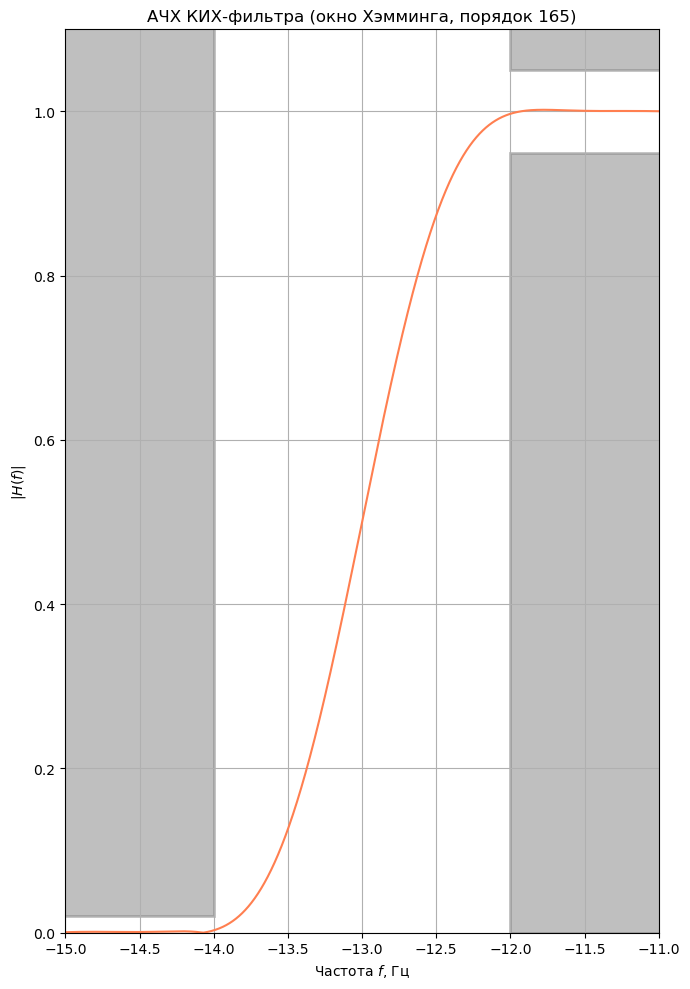

In [34]:
h = signal.firwin(numtaps=N_0, cutoff=fc, width=None, window='hamming', pass_zero='lowpass', fs=fs)
H = abs(np.fft.fftshift(np.fft.fft(h, M)))

plt.figure(figsize=[7, 10])
plt.plot(fs * (np.arange(M) / M - 0.5), H, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title(f'АЧХ КИХ-фильтра (окно Хэмминга, порядок {N_0})')
plt.xlim([-f2 - 1, -f1 + 1])
plt.ylim([0.0, 1.1])
plt.fill([-f1, -f1, f1, f1], [0, 1 - delta1, 1 - delta1, 0], color='gray', lw=2, alpha=0.5)
plt.fill([-fs / 2, -fs / 2, -f2, -f2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([f2, f2, fs / 2, fs / 2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([-f1, -f1, f1, f1], [1 + delta1, 1.2, 1.2, 1 + delta1], color='gray', lw=2, alpha=0.5)
plt.tight_layout()

#### После применения итерационной поцедуры

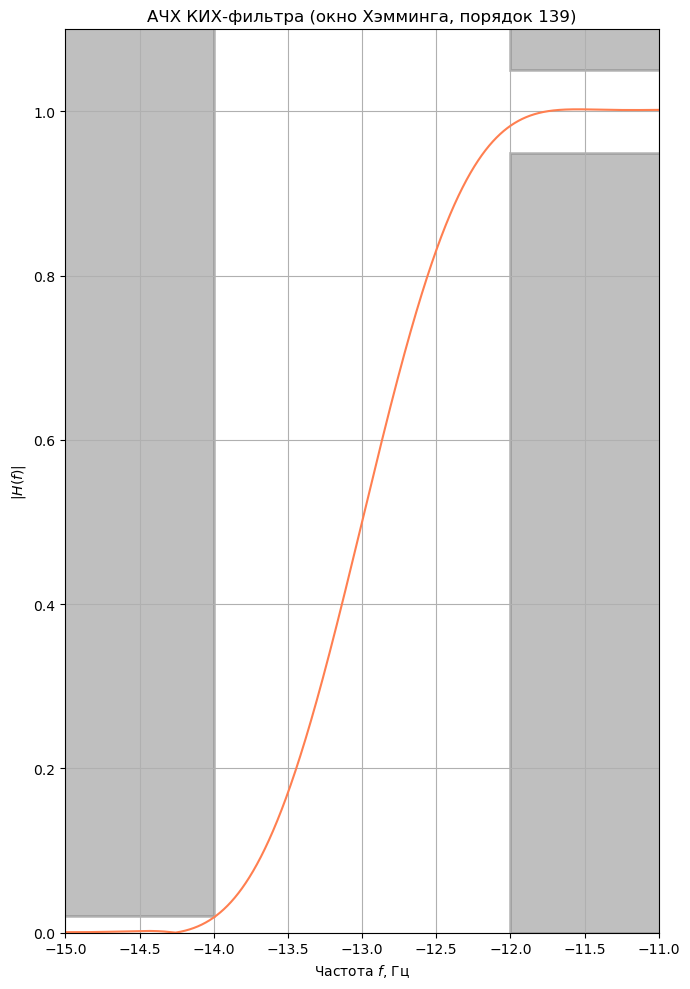

In [35]:
N_1 = 139
h = signal.firwin(numtaps=N_1, cutoff=fc, width=None, window='hamming', pass_zero='lowpass', fs=fs)
H = abs(np.fft.fftshift(np.fft.fft(h, M)))

plt.figure(figsize=[7, 10])
plt.plot(fs * (np.arange(M) / M - 0.5), H, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title(f'АЧХ КИХ-фильтра (окно Хэмминга, порядок {N_1})')
plt.xlim([-f2 - 1, -f1 + 1])
plt.ylim([0.0, 1.1])
plt.fill([-f1, -f1, f1, f1], [0, 1 - delta1, 1 - delta1, 0], color='gray', lw=2, alpha=0.5)
plt.fill([-fs / 2, -fs / 2, -f2, -f2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([f2, f2, fs / 2, fs / 2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([-f1, -f1, f1, f1], [1 + delta1, 1.2, 1.2, 1 + delta1], color='gray', lw=2, alpha=0.5)
plt.tight_layout()

## Задача 2.3. Синтез ФНЧ с окном Кайзера.

Синтезировать КИХ-фильтр нижних частот с окном Кайзера наименьшего порядка при заданных требованиях к АЧХ :
* частота дискретизации $f_s$,
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$,
* максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$.

Параметр $\beta$ и длину окна $N$ определить по эмпирическим формулам, приведенным в лекции, или с помощью функции `signal.kaiserord`. Привести график АЧХ получившегося фильтра, сравнить порядок с фильтром из задачи 2.2. 

In [36]:
N, beta = signal.kaiserord(20 * np.log10(min(delta1, delta2)), (f2 - f1) / (fs / 2))
# N, beta = signal.kaiserord(20 * np.log10(max(delta1, delta2)), (f2 - f1) / (fs / 2)
print(N, beta)

92 2.652339138368929


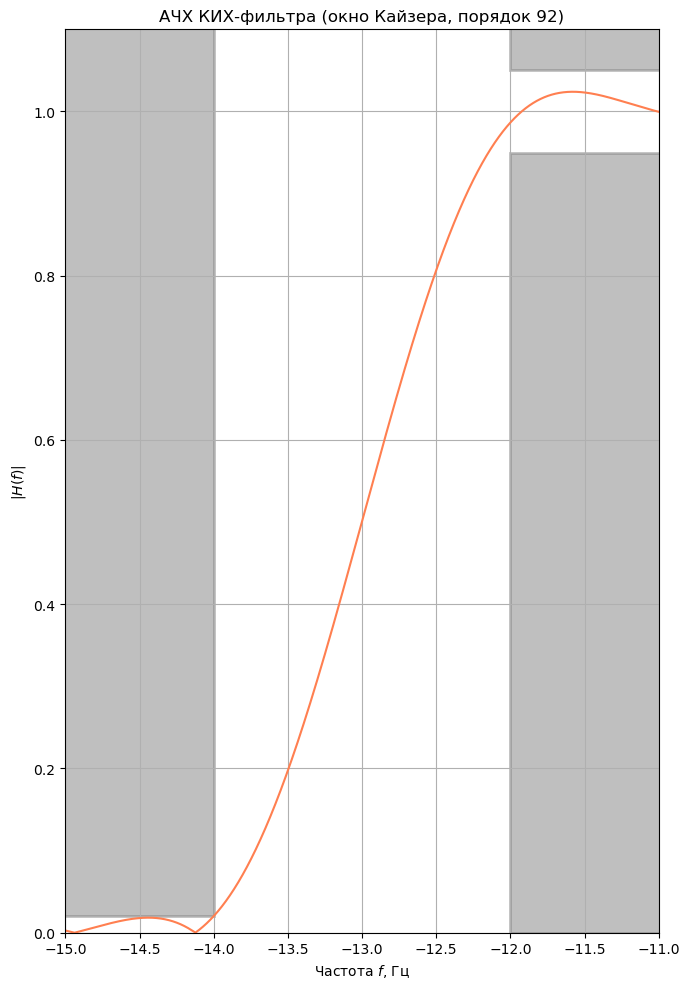

In [37]:
h = signal.firwin(numtaps=N, cutoff=fc, width=None, window=('kaiser', beta), pass_zero='lowpass', fs=fs)
H = abs(np.fft.fftshift(np.fft.fft(h, M)))

plt.figure(figsize=[7, 10])
plt.plot(fs * (np.arange(M) / M - 0.5), H, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title(f'АЧХ КИХ-фильтра (окно Кайзера, порядок {N})')
plt.xlim([-f2 - 1, -f1 + 1])
plt.ylim([0.0, 1.1])
plt.fill([-f1, -f1, f1, f1], [0, 1 - delta1, 1 - delta1, 0], color='gray', lw=2, alpha=0.5)
plt.fill([-fs / 2, -fs / 2, -f2, -f2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([f2, f2, fs / 2, fs / 2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([-f1, -f1, f1, f1], [1 + delta1, 1.2, 1.2, 1 + delta1], color='gray', lw=2, alpha=0.5)
plt.tight_layout()

#  Модуль 3. Оптимизационные методы синтеза КИХ-фильтров

## Задача 3.1. Метод наименьших квадратов.

Синтезировать КИХ-фильтр методом наименьших квадратов наименьшего порядка при заданных требованиях к АЧХ :
* частота дискретизации $f_s$,
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$,
* максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$.

Использовать следующую итерационную процедуру:

1) Выбрать начальный порядок фильтра $R$ (например, можно взять результат решения задачи 2.3).

2) Используя функцию `scipy.signal.firls`, синтезировать КИХ-фильтр порядка $R$ методом наименьших квадратов.

3) Проверить выполнение требований к АЧХ фильтра. Если требования не выпоняются, следует увеличить порядок фильтра $R$ (на некоторое целое число) и перейти на п. 2. Если требования выполняются, то нужно уменьшить порядок фильтра  $R$ и перейти на п. 2. Уменьшение и увеличение порядка производится до тех пор, пока не будет найден минимальный порядок , при котором выполняются требования к АЧХ и уменьшение порядка на единицу приводит к нарушению требований к фильтру. 

Приведите график АЧХ КИХ-фильтра минимального порядка $R_\min$ в итерационной процедуре. 

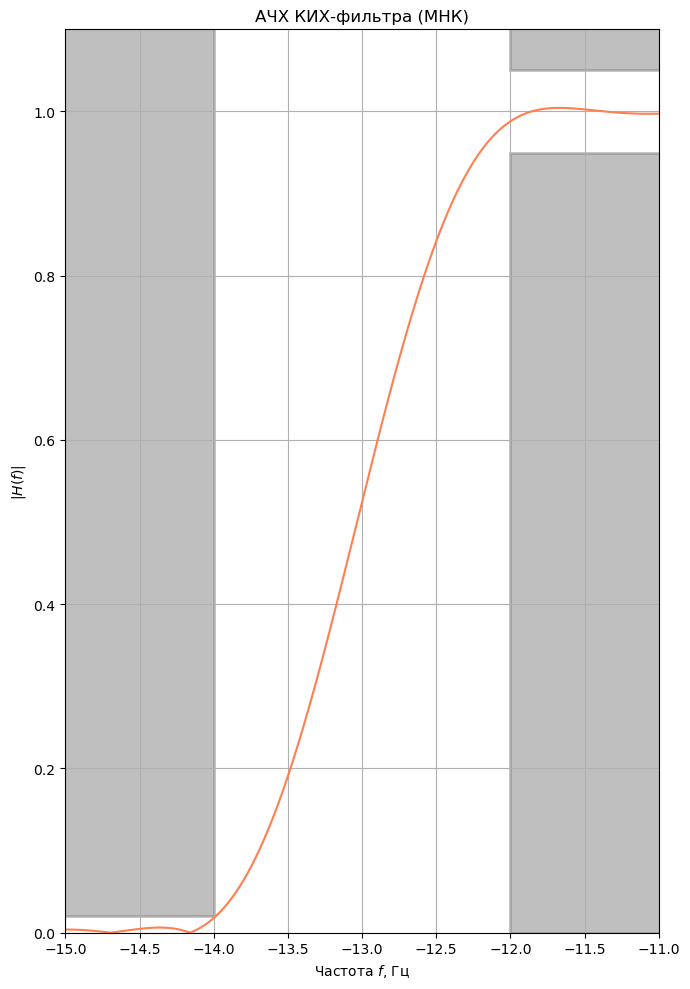

In [38]:
N = 123
bands = np.array([0, f1, f2, fs / 2])
desired = np.array([1, 1, 0, 0])
weight = np.array([1 / delta2, 1 / delta1])

h = signal.firls(numtaps=N, bands=bands, desired=desired, weight=weight, fs=fs)

H = abs(np.fft.fftshift(np.fft.fft(h, M)))

plt.figure(figsize=[7, 10])
plt.plot(fs * (np.arange(M) / M - 0.5), H, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ КИХ-фильтра (МНК)')
plt.xlim([-f2 - 1, -f1 + 1])
plt.ylim([0.0, 1.1])
plt.fill([-f1, -f1, f1, f1], [0, 1 - delta1, 1 - delta1, 0], color='gray', lw=2, alpha=0.5)
plt.fill([-fs / 2, -fs / 2, -f2, -f2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([f2, f2, fs / 2, fs / 2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([-f1, -f1, f1, f1], [1 + delta1, 1.2, 1.2, 1 + delta1], color='gray', lw=2, alpha=0.5)
plt.tight_layout()

## Задача 3.2. Метод равномерной чебышевской аппроксимации.

Синтезировать КИХ-фильтр методом равномерной чебышевской аппроксимации наименьшего порядка при заданных требованиях к АЧХ :
* частота дискретизации $f_s$,
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$,
* максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$.

Использовать следующую итерационную процедуру:

1) Выбрать начальный порядок фильтра $R$ (например, можно взять результат решения задачи 2.3).

2) Используя функцию `scipy.signal.remez`, синтезировать КИХ-фильтр порядка $R$ методом наименьших квадратов.

3) Проверить выполнение требований к АЧХ фильтра. Если требования не выпоняются, следует увеличить порядок фильтра $R$ (на некоторое целое число) и перейти на п. 2. Если требования выполняются, то нужно уменьшить порядок фильтра  $R$ и перейти на п. 2. Уменьшение и увеличение порядка производится до тех пор, пока не будет найден минимальный порядок , при котором выполняются требования к АЧХ и уменьшение порядка на единицу приводит к нарушению требований к фильтру. 

Приведите график АЧХ КИХ-фильтра минимального порядка $R_\min$ в итерационной процедуре. 

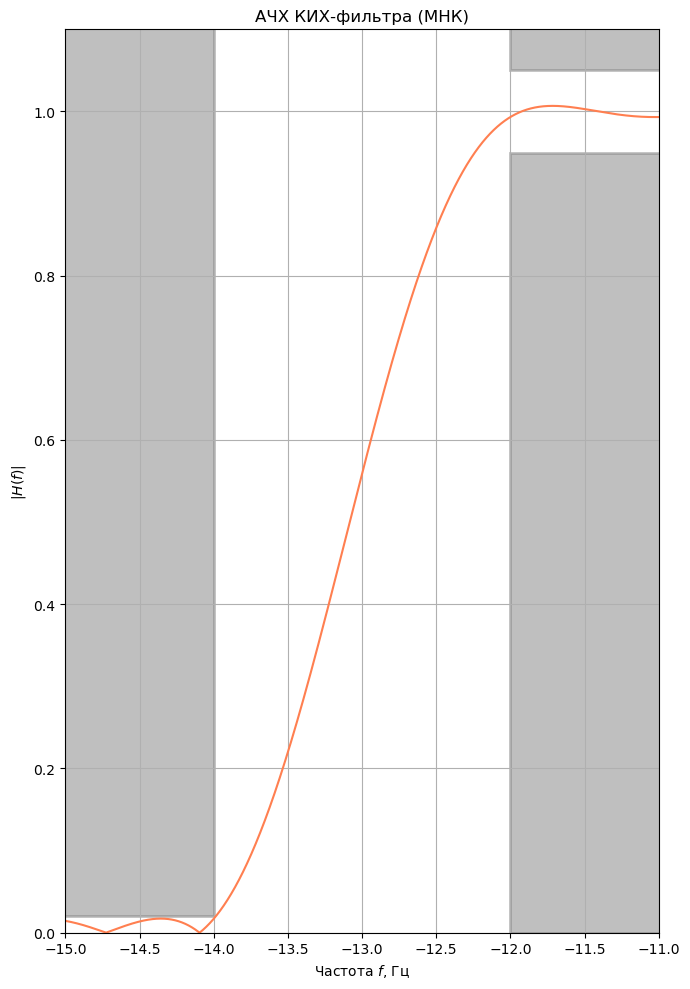

In [39]:
N = 96
bands = np.array([0, f1, f2, fs / 2])
desired = np.array([1, 0])
weight = np.array([1 / delta2, 1 / delta1])

h = signal.remez(numtaps=N, bands=bands, desired=desired, weight=weight, fs=fs)

H = abs(np.fft.fftshift(np.fft.fft(h, M)))

plt.figure(figsize=[7, 10])
plt.plot(fs * (np.arange(M) / M - 0.5), H, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ КИХ-фильтра (МНК)')
plt.xlim([-f2 - 1, -f1 + 1])
plt.ylim([0.0, 1.1])
plt.fill([-f1, -f1, f1, f1], [0, 1 - delta1, 1 - delta1, 0], color='gray', lw=2, alpha=0.5)
plt.fill([-fs / 2, -fs / 2, -f2, -f2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([f2, f2, fs / 2, fs / 2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([-f1, -f1, f1, f1], [1 + delta1, 1.2, 1.2, 1 + delta1], color='gray', lw=2, alpha=0.5)
plt.tight_layout()

## Задача 3.3. Сравнение результатов.

Сравнить минимальные порядки КИХ-фильтров, которые получились в задачах 2.2, 2.3, 3.1 и 3.2. Заполнить таблицу. Определить, будут ли выполняться требование из этих задач для фильтра минимального из получившихся порядков, построенного методом частотной выборки (как в задаче 1.2).


In [40]:
import pandas as pd
plot_data = {}
plot_data["Оконный метод (окно Хэмминга)"]  = ["138", "139"]
plot_data["Оконный метод (окно Кайзера)"]    = ["91", "92"]
plot_data["Метод наименьших квадратов"] = ["122", "123"]
plot_data["Метод равномерной чебышевской аппроксимации"] = ["95", "96"]

df3_3 = pd.DataFrame(data=plot_data, columns = plot_data.keys(),
            index=["R minimal", "N minimal"]).T
# генерировать markdown таблицу
# print(df3_3.to_markdown())
df3_3

,R minimal,N minimal
Оконный метод (окно Хэмминга),138,139
Оконный метод (окно Кайзера),91,92
Метод наименьших квадратов,122,123
Метод равномерной чебышевской аппроксимации,95,96


Берём минимальный порядок — 91 ($N = 92$) и применим его к методу частотной выборки (пункт 1.2).

In [41]:
def get_lowpass_signal(f, fs):
    if 0 <= f <= f1 or fs - f1 <= f <= fs:
        return 1.0 + 0.0j
    elif f1 < f < f2:
        return (f - f2) / (f1 - f2)
    elif fs - f2 < f < fs - f1:
        return (f - fs + f2) / (f2 - f1)
    else:
        return 0.0 + 0.0j

def get_lowpass_phase(f, N, fs):
    return np.exp(-2j * np.pi * (N - 1)/ 2.0 * f / fs)

N = 91
H = sample_signal(lambda f: get_lowpass_signal(f, fs) * get_lowpass_phase(f, N, fs), N, fs)

h = np.fft.ifft(H).real
H1 = abs(np.fft.fft(h, M))

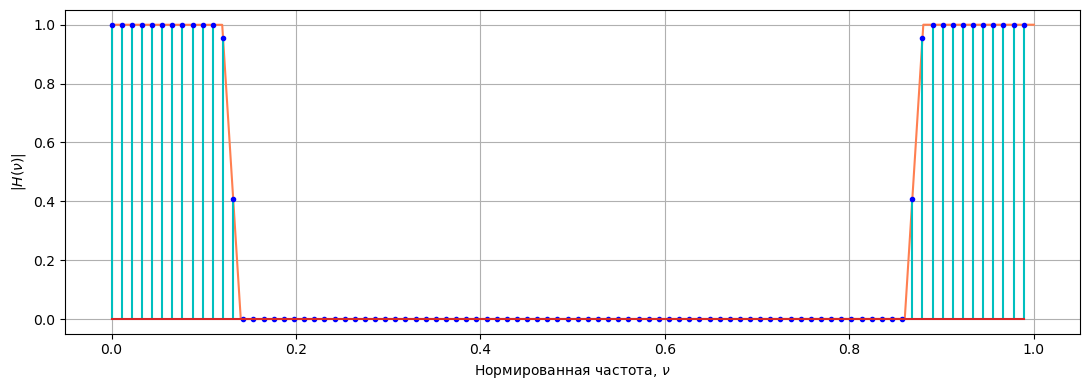

In [42]:
nu_band = np.linspace(0, fs, M) / fs
plt.figure(figsize=[11, 4])
plt.plot(nu_band, [abs(get_lowpass_signal(nu * fs, fs)) for nu in nu_band], color='coral')
plt.stem(np.arange(N) / N, abs(H), linefmt='c', markerfmt='b.')
plt.xlabel('Нормированная частота, $\\nu$')
plt.ylabel('$|H(\\nu)|$')
plt.tight_layout()
plt.grid()

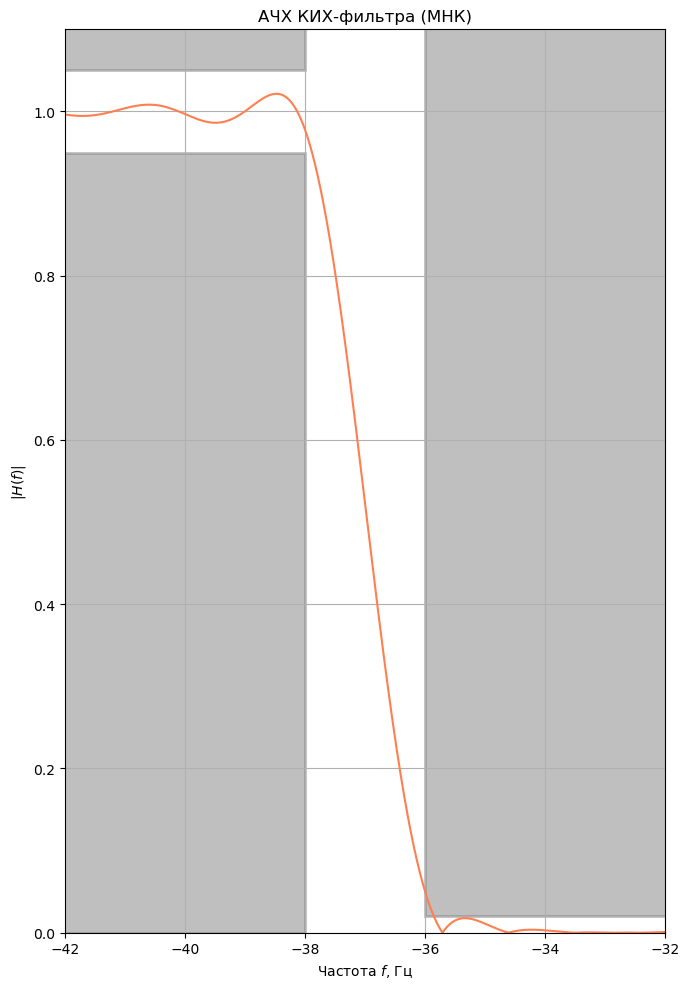

In [43]:
plt.figure(figsize=[7, 10])
plt.plot(fs * (np.arange(M) / M - 0.5), H1, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ КИХ-фильтра (МНК)')
plt.xlim([-fs / 2 + f1 - 4, -fs / 2 + f2 + 4])
plt.ylim([0.0, 1.1])
plt.fill([-fs / 2 + f2, -fs / 2 + f2, 0, 0], [1.2, delta2, delta2, 1.2], color='gray', lw=2, alpha=0.5)
plt.fill([-fs / 2, -fs / 2, -fs / 2 + f1, -fs / 2 + f1], [1 + delta1, 1.2, 1.2, 1 + delta1], color='gray', lw=2, alpha=0.5)
plt.fill([-fs / 2, -fs / 2, -fs / 2 + f1, -fs / 2 + f1], [1 - delta1, 0, 0, 1 - delta1], color='gray', lw=2, alpha=0.5)
# plt.fill([-f1, -f1, f1, f1], [1 + delta1, 1.2, 1.2, 1 + delta1], color='gray', lw=2, alpha=0.5)
plt.tight_layout()

Сразу видно, что в полосе задерживания полученный фильтр не удовлетворяет поставленным условиям.

#  Модуль 4. Фильтрация сигнала.

## Задача 4.1. Фильтрация АМ-сигнала, полученного с помощью цифрового осциллографа.
Установить в управляющей программе цифрового осциллографа следующие параметры. 
* Число выборок 1000, режим "Нормально".
* Пробник "х1".
* Частота дискретизации 100 кГц (Время/дел 1mS) или 200 кГц (Время/дел 0,5mS) в соответствии с вариантом задания. 
* Синхронизация "Вкл." и "Авто".
* Генератор: Генератор: режим "АМ/ЧМ", вид "~", диапазон "10K", размах колебания 4В. Частоту генератора выбрать в соответствии с вариантом из таблицы. Установить частоту несущей $f_0$ в соответствии с вариантом задания. 
* Модуляция генератора (меню "Настройки"): режим "АМ", коэффициент модуляции 70%, модулирующая частота 1кГц. 

Выполнить следующую последовательность действий. 
1) Пронаблюдать сигнал с амплитудной модуляцией. 
2) Записать выборки в текстовый файл.
3) Синтезировать КИХ-фильтр одним из рассмотренных методов так, чтобы его АЧХ удовлетворяла условиям задачи. При этом не обязательно использовать фильтр наименьшего возможного порядка. 
4) Провести фильтрацию сигнала. Сравнить сигналы и спектры сигналов до и после фильтрации.
5) Определить групповую задержку фильтра в мс. 
6) Синтезировать БИХ-фильтр Баттерворта, удовлетворяющий тем же требованиям. Сравнить результаты фильтрации сигналов КИХ-фильтром и БИХ-фильтром во временной области.

### Синтез КИХ-фильтра

Возьмём фильтр из пункта 2.3 (фильтр с окном Кайзера), удовлетворяющий условиям задачи.

In [44]:
N, beta = signal.kaiserord(20 * np.log10(min(delta1, delta2)), (f2 - f1) / (fs / 2))
print(N, beta)

92 2.652339138368929


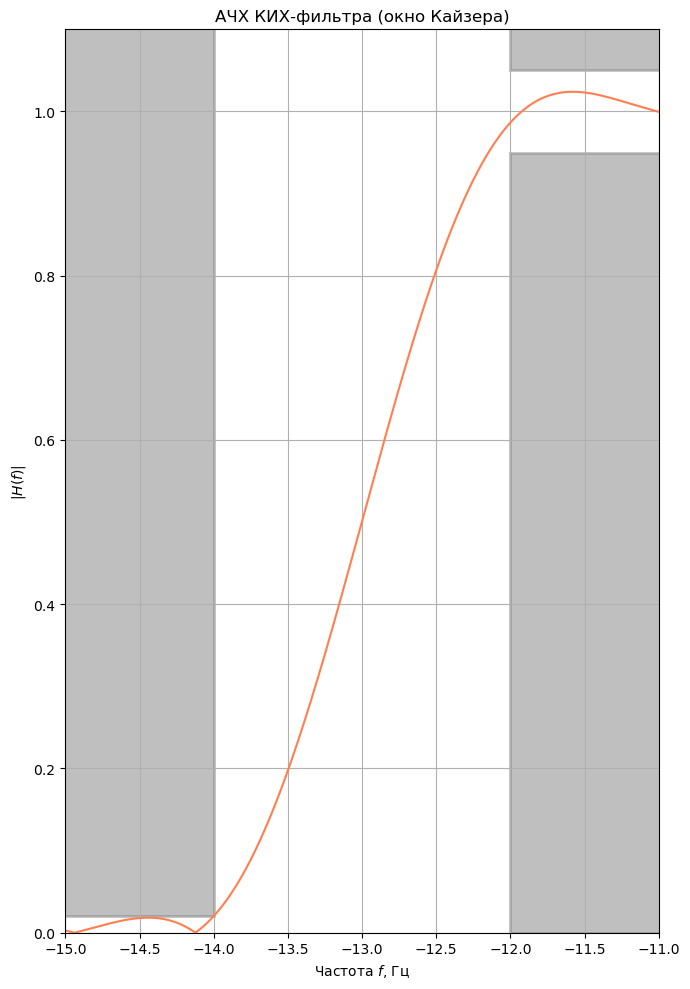

In [45]:
h = signal.firwin(numtaps=N, cutoff=fc, width=None, window=('kaiser', beta), pass_zero='lowpass', fs=fs)
H = abs(np.fft.fftshift(np.fft.fft(h, M)))

plt.figure(figsize=[7, 10])
plt.plot(fs * (np.arange(M) / M - 0.5), H, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ КИХ-фильтра (окно Кайзера)')
plt.xlim([-f2 - 1, -f1 + 1])
plt.ylim([0.0, 1.1])
plt.fill([-f1, -f1, f1, f1], [0, 1 - delta1, 1 - delta1, 0], color='gray', lw=2, alpha=0.5)
plt.fill([-fs / 2, -fs / 2, -f2, -f2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([f2, f2, fs / 2, fs / 2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([-f1, -f1, f1, f1], [1 + delta1, 1.2, 1.2, 1 + delta1], color='gray', lw=2, alpha=0.5)
plt.tight_layout()

Определим групповую задержку фильтра.

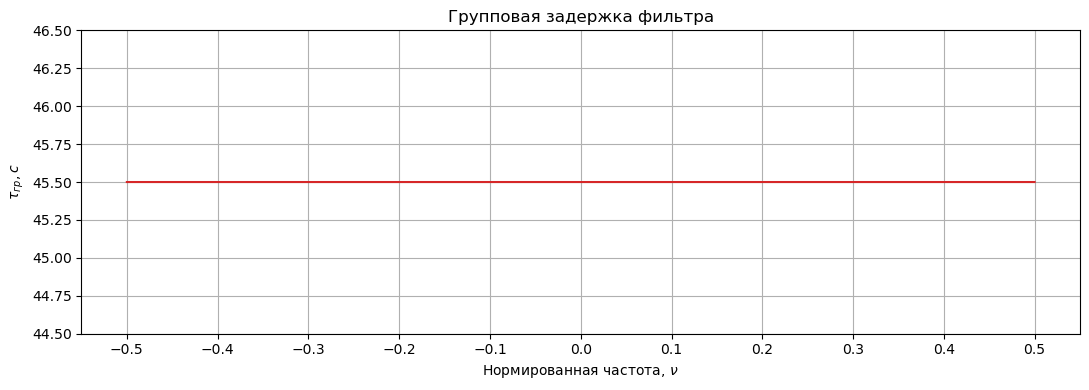

In [46]:
delta=1e-6
nu, gd = signal.group_delay((h, [1]), w=np.linspace(-0.5+delta, 0.5-delta, num=2048), fs=1)

plt.figure(figsize=[11, 4])
plt.title('Групповая задержка фильтра')
plt.plot(nu, gd*1, 'C3')
plt.ylabel('$\\tau_{{гр}}, c$')
plt.xlabel('Нормированная частота, $\\nu$')
plt.ylim([min(gd)-1, max(gd)+1])
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

### Сигнал до фильтрации

In [47]:
filename = "modulation_data.txt"

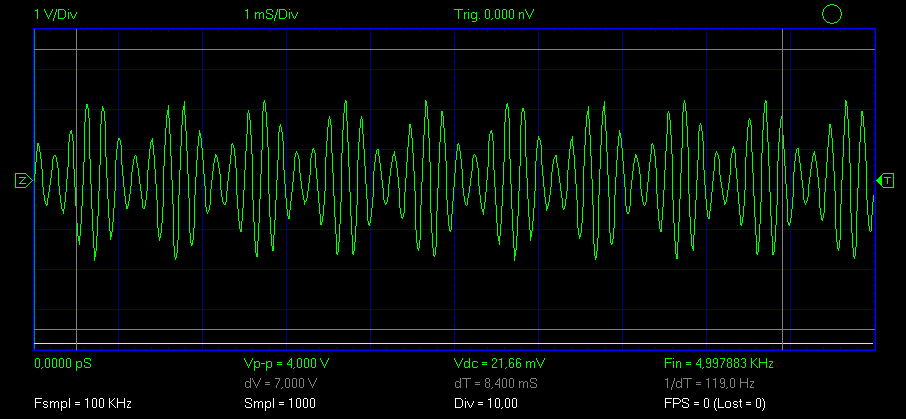

In [48]:
from IPython.display import Image
image_path = "modulation_data.png"
Image(filename=image_path)

In [49]:
with open(filename, "r") as file:
    lines = file.readlines()

sample_values = []
for line in lines[6:]:
    columns = line.split()
    if len(columns) >= 2:
        sample_values.append(int(columns[1]))

print(sample_values)
print(len(sample_values))

[134, 144, 154, 161, 164, 164, 160, 155, 148, 140, 132, 126, 119, 117, 114, 115, 117, 122, 127, 133, 139, 145, 149, 153, 154, 154, 152, 147, 141, 134, 126, 119, 113, 110, 108, 109, 113, 120, 130, 140, 150, 160, 169, 173, 174, 169, 162, 150, 137, 121, 107, 94, 86, 83, 85, 93, 105, 121, 140, 158, 174, 187, 195, 195, 190, 178, 161, 142, 121, 102, 86, 75, 70, 73, 82, 97, 114, 137, 155, 173, 185, 193, 192, 188, 176, 161, 145, 128, 111, 98, 90, 87, 89, 96, 106, 118, 133, 145, 156, 163, 168, 168, 166, 160, 151, 142, 133, 125, 118, 113, 112, 112, 115, 120, 126, 133, 138, 144, 149, 153, 154, 153, 150, 147, 141, 134, 129, 122, 117, 113, 112, 112, 116, 121, 129, 138, 147, 156, 163, 167, 168, 166, 160, 150, 137, 125, 112, 101, 92, 86, 89, 94, 106, 120, 137, 154, 170, 182, 191, 194, 189, 179, 164, 144, 125, 105, 88, 76, 71, 73, 79, 94, 112, 133, 152, 171, 186, 194, 197, 192, 182, 166, 149, 130, 111, 97, 87, 82, 83, 90, 101, 115, 130, 144, 157, 166, 173, 174, 171, 165, 156, 145, 134, 125, 116, 110, 

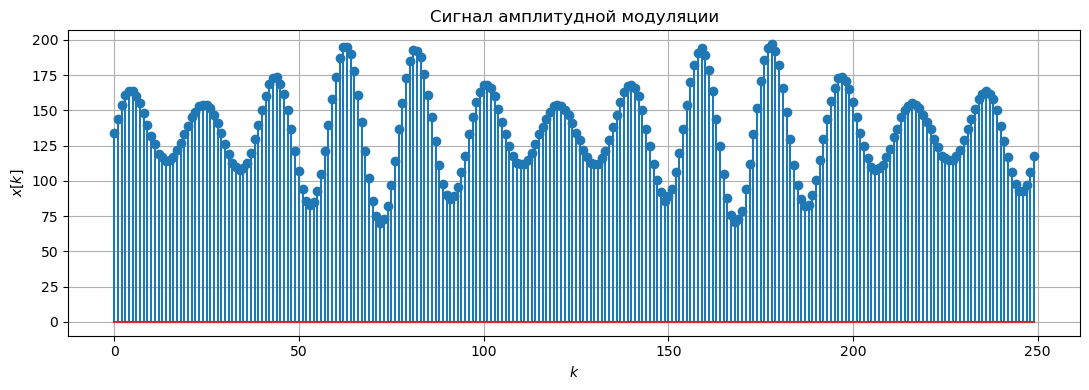

In [50]:
plt.figure(figsize=[11, 4])
plt.stem(np.arange(len(sample_values[:250])), sample_values[:250])
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$x[k]$')
plt.title("Сигнал амплитудной модуляции")
plt.tight_layout()

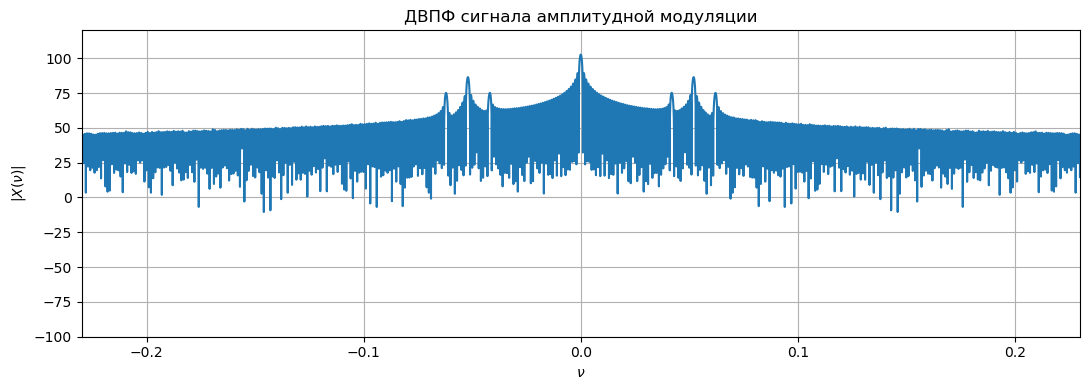

In [51]:
X = np.fft.fftshift(np.fft.fft(sample_values, M))
nu = -0.5 + np.arange(M) / M

plt.figure(figsize=[11, 4])
plt.plot(nu, 20 * np.log10(abs(X)))
plt.grid()
plt.xlabel('$\\nu$')
plt.xlim(-0.23, 0.23)
plt.ylim(-100, 120)
plt.ylabel('$|X(\\nu)|$')
plt.title("ДВПФ сигнала амплитудной модуляции")
plt.tight_layout()

### Сигнал после фильтрации (КИХ-фильтра с окном Кайзера)

134693.0 1.0239814846447466


/tmp/ipykernel_31949/2028743880.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.plot(nu, 20 * np.log10(abs(H)))
/tmp/ipykernel_31949/2028743880.py:15: RuntimeWarning: divide by zero encountered in log10
  plt.plot(nu, 20 * np.log10(abs(X_filtered)))


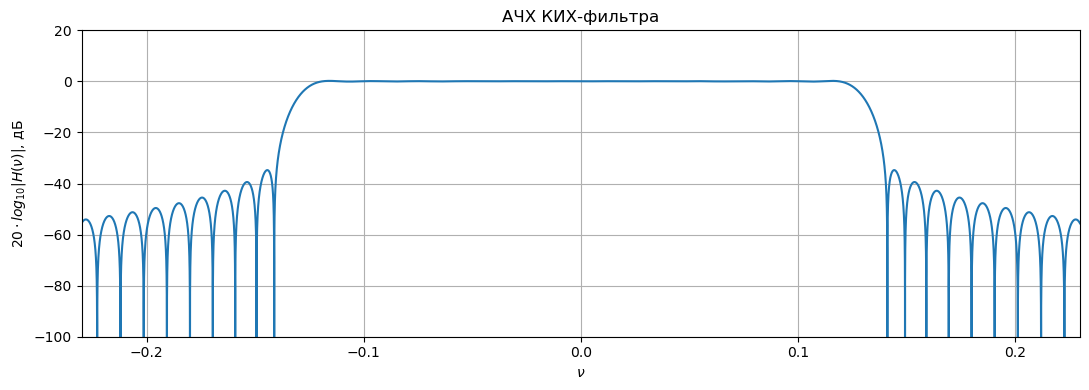

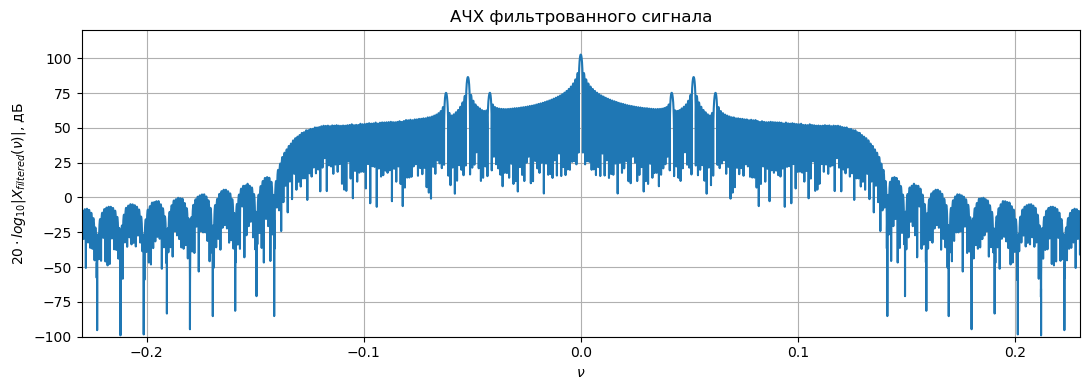

In [52]:
X_filtered = X * H
print(max(abs(X)), max(abs(H)))

plt.figure(figsize=[11, 4])
plt.plot(nu, 20 * np.log10(abs(H)))
plt.grid()
plt.xlabel('$\\nu$')
plt.xlim(-0.23, 0.23)
plt.ylim(-100, 20)
plt.ylabel('$20 \\cdot log_{10}|H(\\nu)|$, дБ')
plt.title("АЧХ КИХ-фильтра")
plt.tight_layout()

plt.figure(figsize=[11, 4])
plt.plot(nu, 20 * np.log10(abs(X_filtered)))
plt.grid()
plt.xlabel('$\\nu$')
plt.xlim(-0.23, 0.23)
plt.ylim(-100, 120)
plt.ylabel('$20 \\cdot log_{10}|X_{filtered}(\\nu)|$, дБ')
plt.title("АЧХ фильтрованного сигнала")
plt.tight_layout()

1048576


/usr/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/lib/python3.12/site-packages/numpy/ma/core.py:3413: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/usr/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


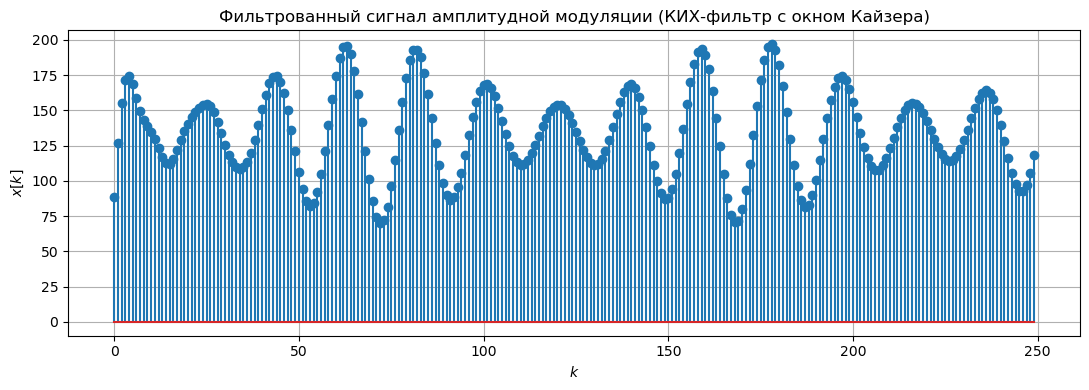

In [53]:
sample_values_filtered = np.fft.ifft(np.fft.ifftshift(X_filtered))
print(len(sample_values_filtered))

plt.figure(figsize=[11, 4])
plt.stem(np.arange(len(sample_values_filtered[:250])), sample_values_filtered[:250])
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$x[k]$')
plt.title("Фильтрованный cигнал амплитудной модуляции (КИХ-фильтр с окном Кайзера)")
plt.tight_layout()

### Сигнал после фильтрации (БИХ-фильтр Баттерворта)

30


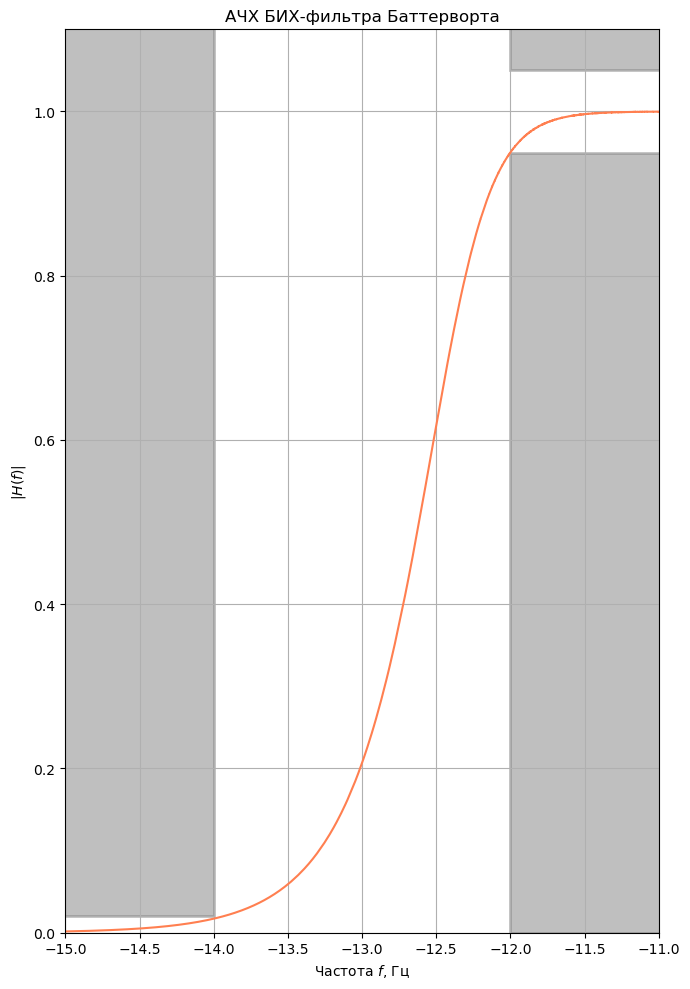

In [54]:
gpass = -20 * np.log10(1 - delta1)
gstop = -20 * np.log10(delta2)

N, Wn = signal.buttord(wp=f1, ws=f2, gpass=gpass, gstop=gstop, analog=False, fs=fs)
beta, alpha = signal.butter(N, Wn=Wn, btype='lowpass', analog=False, output='ba', fs=fs)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs / 2, fs / 2, M), fs=fs)
print(N)

plt.figure(figsize=[7, 10])
plt.plot(fs * (np.arange(M) / M - 0.5), abs(H), color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ БИХ-фильтра Баттерворта')
plt.xlim([-f2 - 1, -f1 + 1])
plt.ylim([0.0, 1.1])
plt.fill([-f1, -f1, f1, f1], [0, 1 - delta1, 1 - delta1, 0], color='gray', lw=2, alpha=0.5)
plt.fill([-fs / 2, -fs / 2, -f2, -f2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([f2, f2, fs / 2, fs / 2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([-f1, -f1, f1, f1], [1 + delta1, 1.2, 1.2, 1 + delta1], color='gray', lw=2, alpha=0.5)
plt.tight_layout()


134693.0 1.0000864213091973


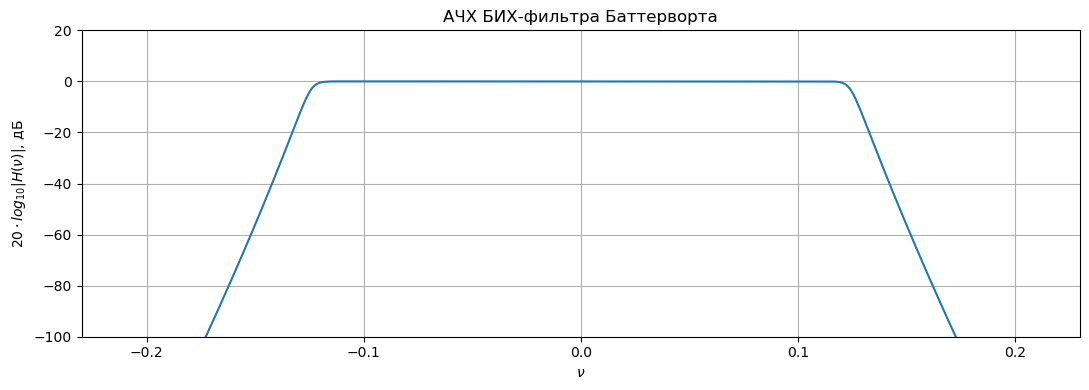

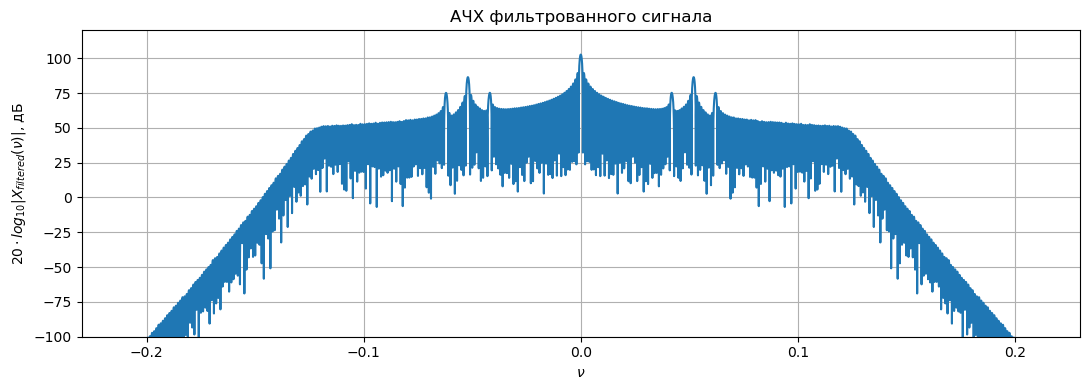

In [55]:
X_filtered = X * H
print(max(abs(X)), max(abs(H)))

plt.figure(figsize=[11, 4])
plt.plot(nu, 20 * np.log10(abs(H)))
plt.grid()
plt.xlabel('$\\nu$')
plt.xlim(-0.23, 0.23)
plt.ylim(-100, 20)
plt.ylabel('$20 \\cdot log_{10}|H(\\nu)|$, дБ')
plt.title("АЧХ БИХ-фильтра Баттерворта")
plt.tight_layout()

plt.figure(figsize=[11, 4])
plt.plot(nu, 20 * np.log10(abs(X_filtered)))
plt.grid()
plt.xlabel('$\\nu$')
plt.xlim(-0.23, 0.23)
plt.ylim(-100, 120)
plt.ylabel('$20 \\cdot log_{10}|X_{filtered}(\\nu)|$, дБ')
plt.title("АЧХ фильтрованного сигнала")
plt.tight_layout()

1048576


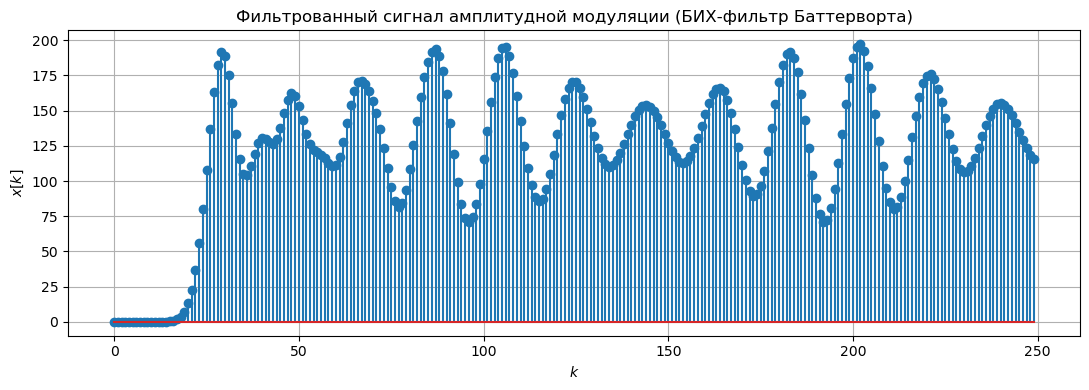

In [56]:
sample_values_filtered = np.fft.ifft(np.fft.ifftshift(X_filtered))
print(len(sample_values_filtered))

plt.figure(figsize=[11, 4])
plt.stem(np.arange(len(sample_values_filtered[:250])), sample_values_filtered[:250])
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$x[k]$')
plt.title("Фильтрованный cигнал амплитудной модуляции (БИХ-фильтр Баттерворта)")
plt.tight_layout()